In [1]:
import warnings
warnings.filterwarnings('ignore')
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import stereo as st
import squidpy as sp
import scanpy as sc

# mouse heart

[2025-04-14 15:31:41][Stereo][3316536][MainThread][140232028951680][reader][1070][INFO]: read_gef begin ...


2025-04-14 15:31:41 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef specify block size:50
2025-04-14 15:31:45 [INFO   ] generateBinInfo elspaed 5.684218 cpu sec


[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][reader][1241][INFO]: the matrix has 38569 cells, and 30071 genes.
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][reader][1242][INFO]: read_gef end.
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][41][INFO]: start to run cal_qc...
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][44][INFO]: cal_qc end, consume time 0.1307s.
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][41][INFO]: start to run filter_cells...
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][44][INFO]: filter_cells end, consume time 0.1468s.
[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][41][INFO]: start to run filter_genes...


StereoExpData object with n_cells X n_genes = 38569 X 30071
bin_type: bins
bin_size: 50
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []


[2025-04-14 15:31:47][Stereo][3316536][MainThread][140232028951680][st_pipeline][44][INFO]: filter_genes end, consume time 0.0886s.


StereoExpData object with n_cells X n_genes = 34171 X 16359
bin_type: bins
bin_size: 50
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

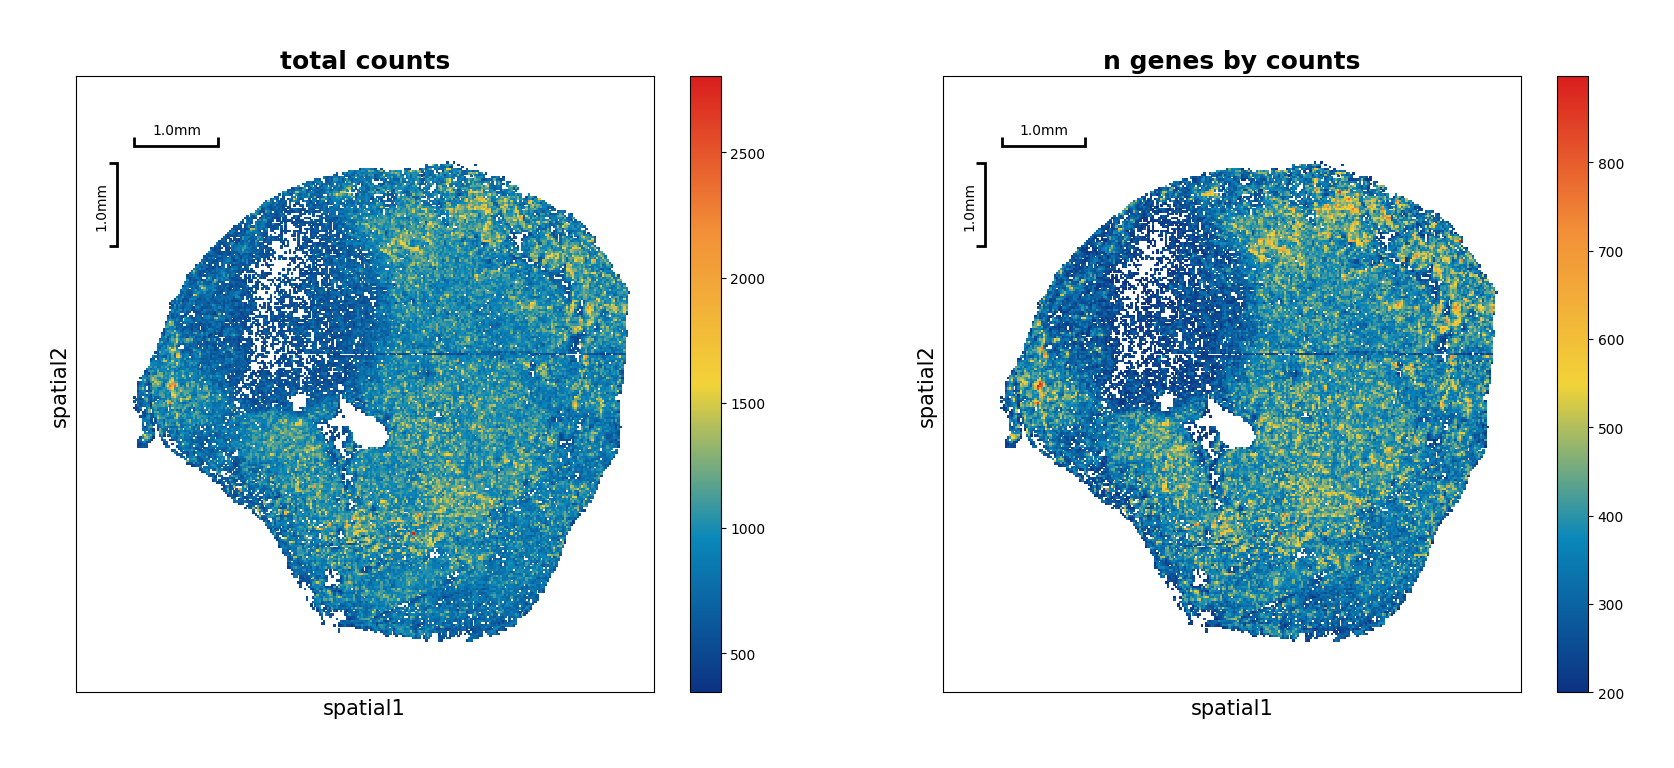

In [2]:
## Load into stereoexpdata object
wt_mouse_heart = st.io.read_gef(file_path="/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef",bin_size=50)
wt_mouse_heart.tl.cal_qc()
print(wt_mouse_heart)

wt_mouse_heart.tl.filter_cells(
        #Min number of counts for a cell/bin to pass filtering
        min_gene=250,
      #  max_gene=1500,
        ##Minium number of genes expressed of cell to pass filtering
        min_n_genes_by_counts=200,
       # max_n_genes_by_counts=600,
        #max percentage of mitochondrial genes
        pct_counts_mt=10,
        inplace=True
        )

wt_mouse_heart.tl.filter_genes(min_cell=15) ## min and max number of cells to express a gene to pass filtering
print(wt_mouse_heart)
## Let's look at some spatial qc
wt_mouse_heart.plt.spatial_scatter()

[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][960][INFO]: Rename QC info.
[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][964][INFO]: Finished conversion to anndata.
[2025-04-14 15:31:49][Stereo][3316536][MainThread][140232028951680][reader][968][INFO]: Finished output to mouseheart_bin50.h5ad


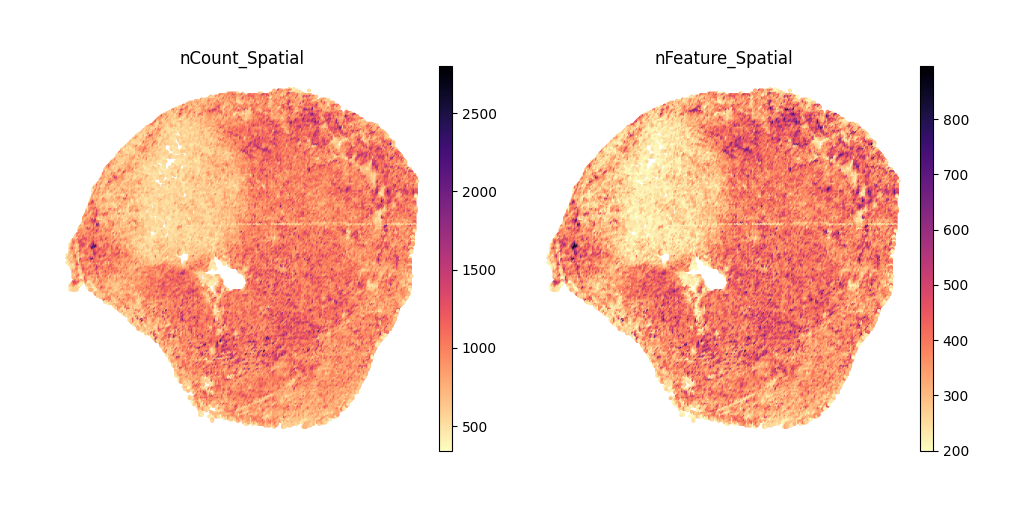

In [3]:
mouseheart = st.io.stereo_to_anndata(wt_mouse_heart,flavor='seurat',
                                output='mouseheart_bin50.h5ad')
mh=ad.read('mouseheart_bin50.h5ad')
sp.pl.spatial_scatter(
    mh, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False,save = "mouseheart_bin50_binsize.png"
)

[2025-04-14 11:40:10][Stereo][3309661][MainThread][140188279518336][reader][1070][INFO]: read_gef begin ...


2025-04-14 11:40:10 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef specify block size:100
2025-04-14 11:40:13 [INFO   ] generateBinInfo elspaed 5.169267 cpu sec


[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][1241][INFO]: the matrix has 9773 cells, and 30071 genes.
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][1242][INFO]: read_gef end.
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run cal_qc...
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: cal_qc end, consume time 0.0882s.
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run filter_cells...
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: filter_cells end, consume time 0.0711s.
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run filter_genes...
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: filter_genes end, consume time 0.0723s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

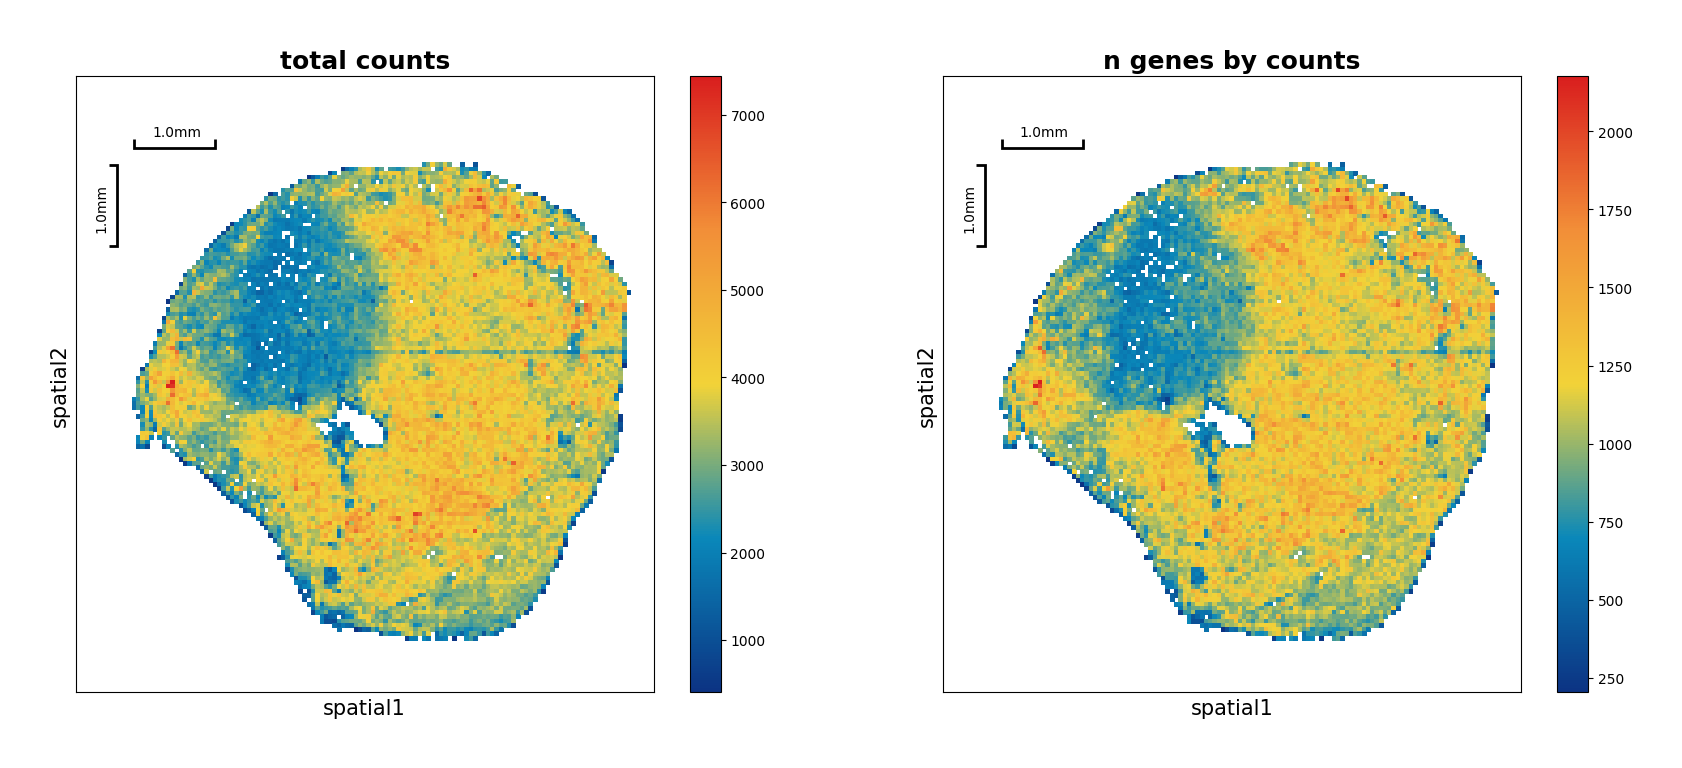

In [4]:
## Load into stereoexpdata object
wt_mouse_heart2 = st.io.read_gef(file_path="/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef",bin_size=100)
wt_mouse_heart2.tl.cal_qc()

wt_mouse_heart2.tl.filter_cells(
        #Min number of counts for a cell/bin to pass filtering
        min_gene=250,
      #  max_gene=1500,
        ##Minium number of genes expressed of cell to pass filtering
        min_n_genes_by_counts=200,
       # max_n_genes_by_counts=600,
        #max percentage of mitochondrial genes
        pct_counts_mt=10,
        inplace=True
        )

wt_mouse_heart2.tl.filter_genes(min_cell=15) ## min and max number of cells to express a gene to pass filtering

## Let's look at some spatial qc
wt_mouse_heart2.plt.spatial_scatter()

[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][960][INFO]: Rename QC info.
[2025-04-14 11:40:15][Stereo][3309661][MainThread][140188279518336][reader][964][INFO]: Finished conversion to anndata.
[2025-04-14 11:40:16][Stereo][3309661][MainThread][140188279518336][reader][968][INFO]: Finished output to mouseheart_bin100.h5ad


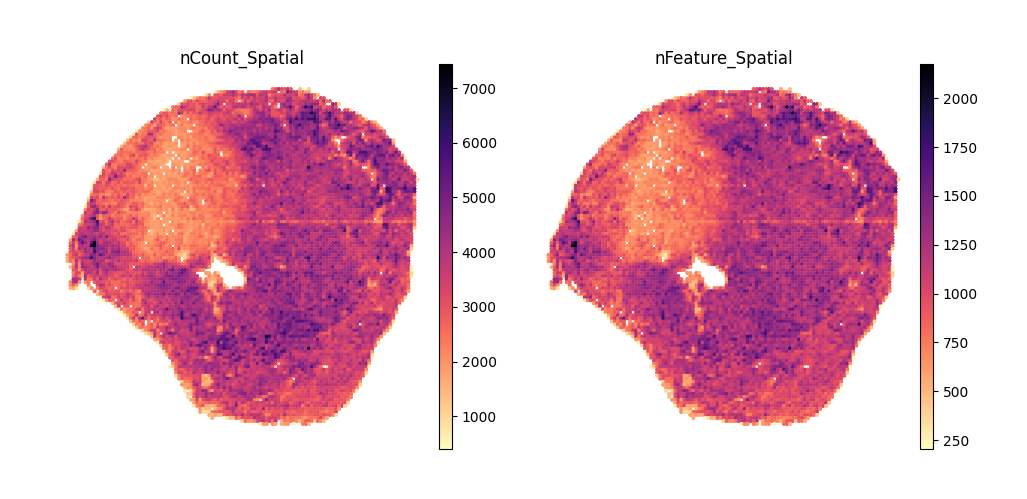

In [5]:
mouseheart = st.io.stereo_to_anndata(wt_mouse_heart2,flavor='seurat',
                                output='mouseheart_bin100.h5ad')
mh=ad.read('mouseheart_bin100.h5ad')
sp.pl.spatial_scatter(
    mh, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False,save = "mouseheart_bin100_binsize.png"
)

[2025-04-14 11:40:16][Stereo][3309661][MainThread][140188279518336][reader][1070][INFO]: read_gef begin ...


2025-04-14 11:40:16 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef specify block size:75
2025-04-14 11:40:20 [INFO   ] generateBinInfo elspaed 5.253335 cpu sec


[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][reader][1241][INFO]: the matrix has 17259 cells, and 30071 genes.
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][reader][1242][INFO]: read_gef end.
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run cal_qc...
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: cal_qc end, consume time 0.0930s.
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run filter_cells...
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: filter_cells end, consume time 0.0903s.
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][41][INFO]: start to run filter_genes...
[2025-04-14 11:40:21][Stereo][3309661][MainThread][140188279518336][st_pipeline][44][INFO]: filter_genes end, consume time 0.0795s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

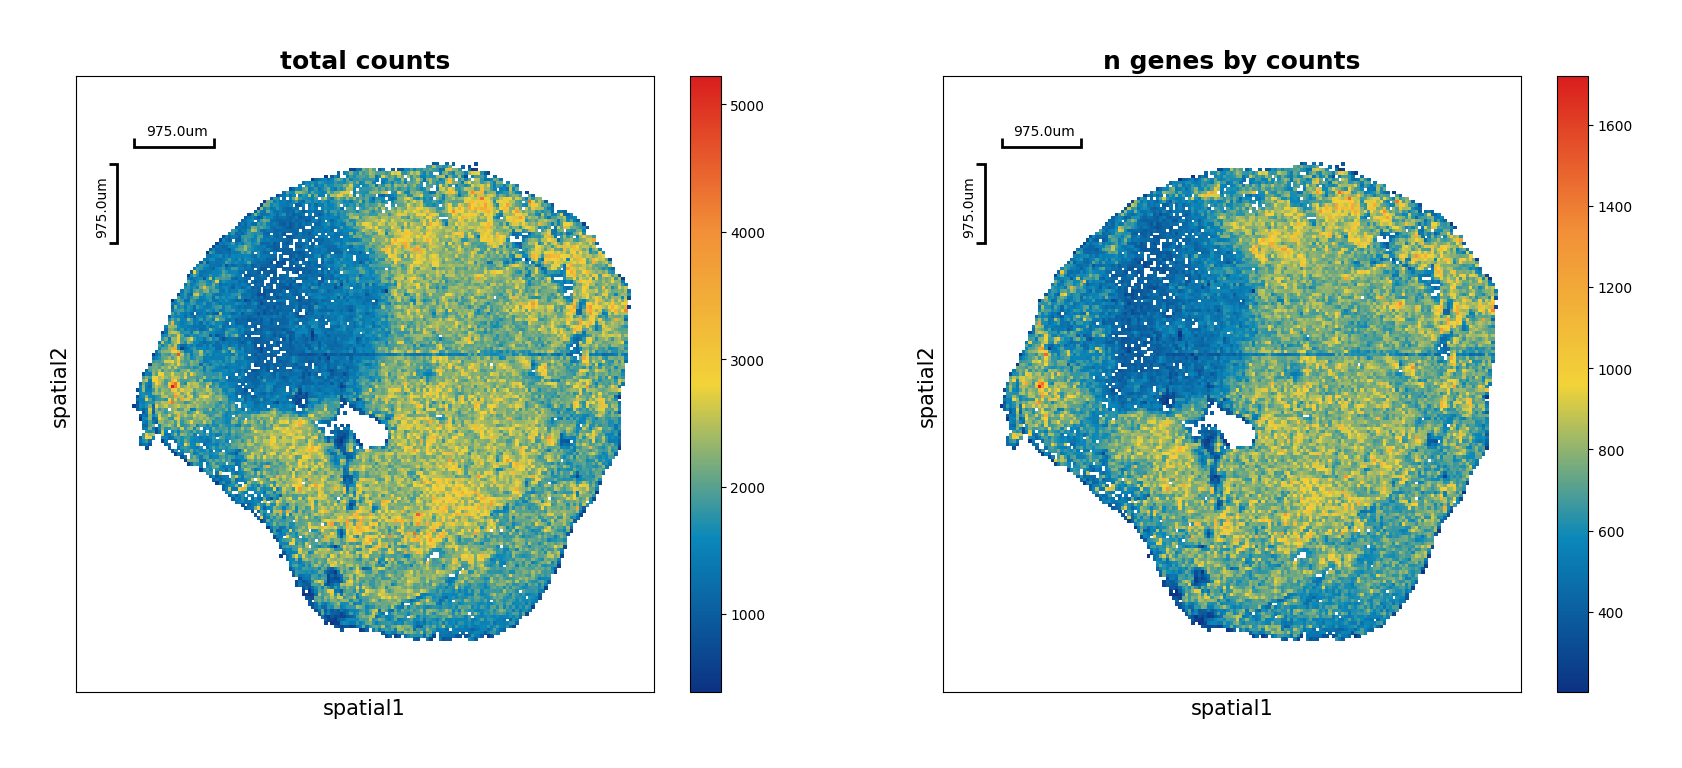

In [6]:
## Load into stereoexpdata object
wt_mouse_heart3 = st.io.read_gef(file_path="/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_heart_v2/04.tissuecut/A02499B2.tissue.gef",bin_size=75)
wt_mouse_heart3.tl.cal_qc()

wt_mouse_heart3.tl.filter_cells(
        #Min number of counts for a cell/bin to pass filtering
        min_gene=250,
      #  max_gene=1500,
        ##Minium number of genes expressed of cell to pass filtering
        min_n_genes_by_counts=200,
       # max_n_genes_by_counts=600,
        #max percentage of mitochondrial genes
        pct_counts_mt=10,
        inplace=True
        )

wt_mouse_heart3.tl.filter_genes(min_cell=15) ## min and max number of cells to express a gene to pass filtering

## Let's look at some spatial qc
wt_mouse_heart3.plt.spatial_scatter()

[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][960][INFO]: Rename QC info.
[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][964][INFO]: Finished conversion to anndata.
[2025-04-14 11:40:22][Stereo][3309661][MainThread][140188279518336][reader][968][INFO]: Finished output to mouseheart_bin75.h5ad


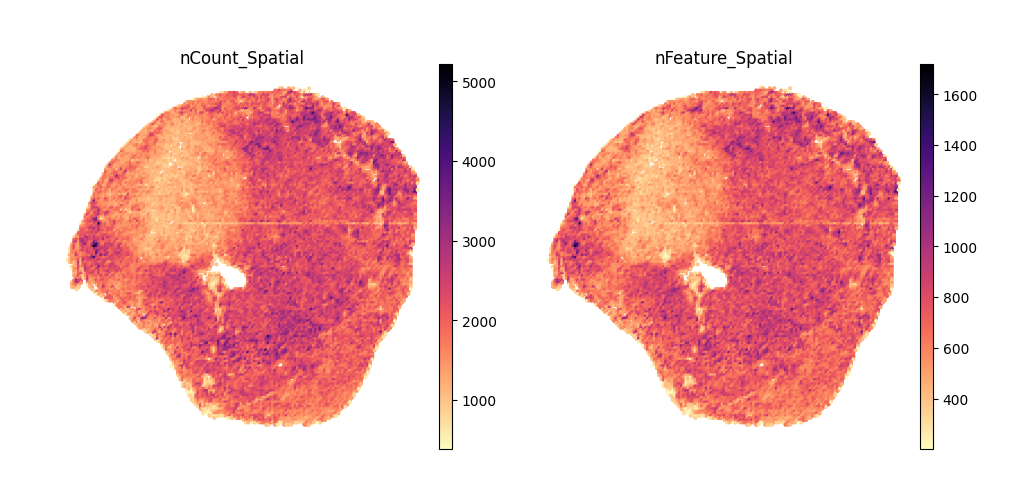

In [7]:
mouseheart = st.io.stereo_to_anndata(wt_mouse_heart3,flavor='seurat',
                                output='mouseheart_bin75.h5ad')
mh=ad.read('mouseheart_bin75.h5ad')
sp.pl.spatial_scatter(
    mh, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save = "mouseheart_bin75_binsize.svg"
)

## Kidney 

[2025-03-25 14:00:01][Stereo][2397974][MainThread][139793718494336][reader][1070][INFO]: read_gef begin ...


2025-03-25 14:00:01 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef specify block size:50


[2025-03-25 14:00:02][Stereo][2397974][MainThread][139793718494336][reader][1241][INFO]: the matrix has 162366 cells, and 36772 genes.
[2025-03-25 14:00:02][Stereo][2397974][MainThread][139793718494336][reader][1242][INFO]: read_gef end.
[2025-03-25 14:00:02][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-25 14:00:03][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: cal_qc end, consume time 0.1054s.
[2025-03-25 14:00:03][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-25 14:00:03][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: filter_cells end, consume time 0.0839s.
[2025-03-25 14:00:03][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-25 14:00:03][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: filter_genes end, consume time 0.0148s.
[2025-03-25 14:

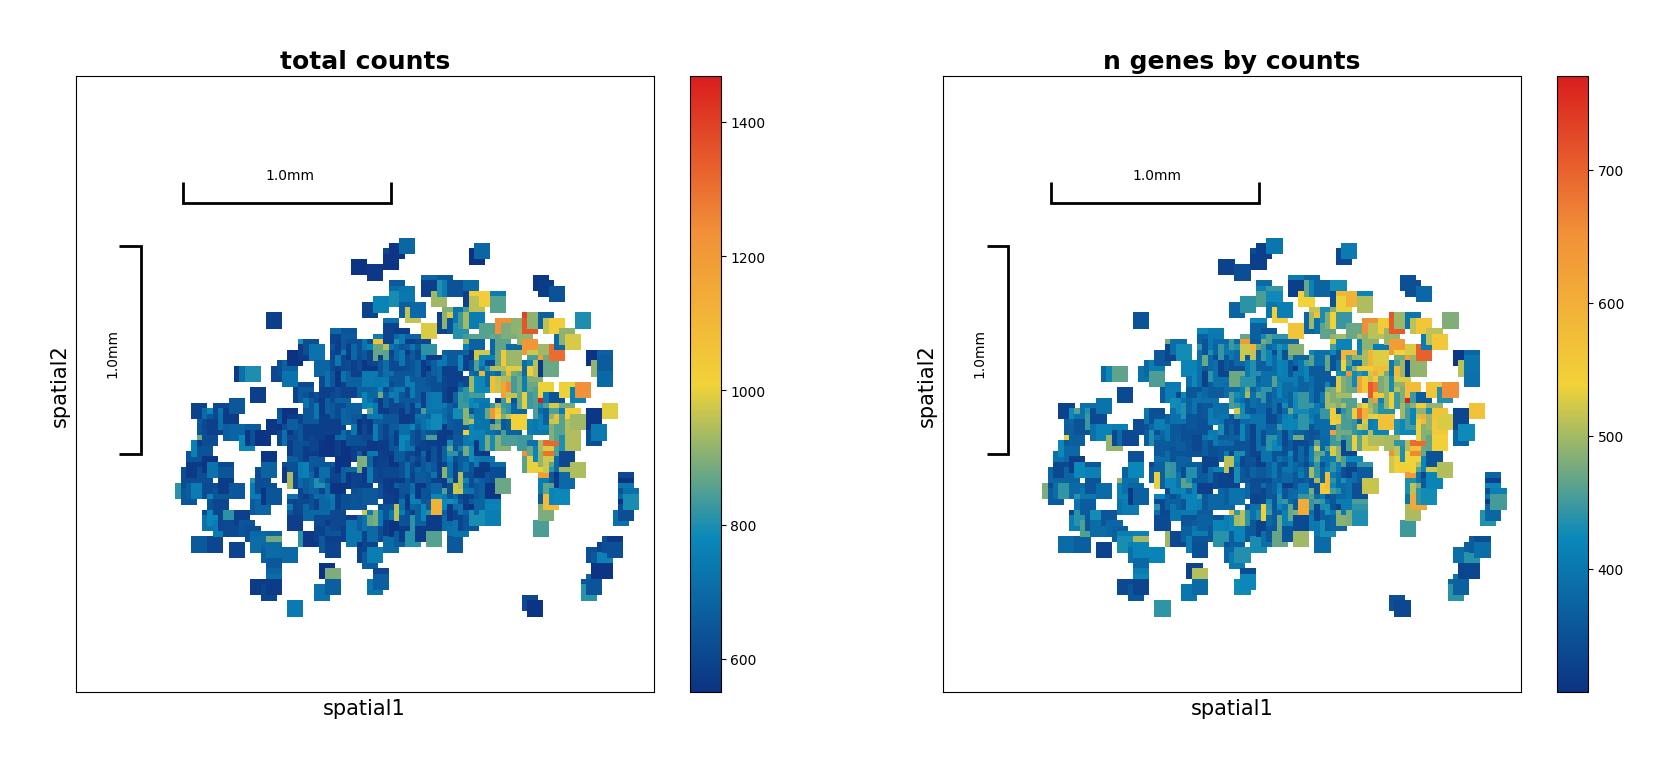

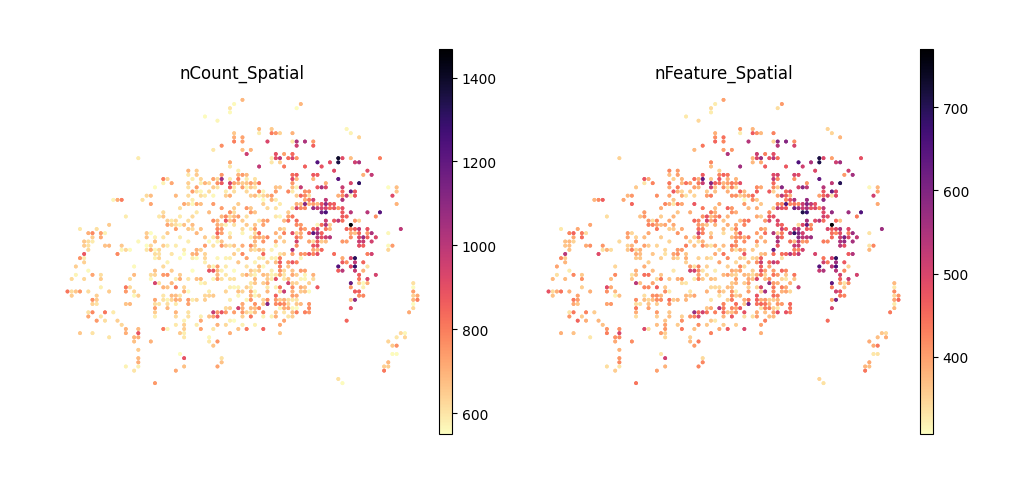

In [2]:
kidney=st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef', bin_size=50)
#kidney= st.io.read_ann_h5ad(input_file_kidney, spatial_key='spatial')
#kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
# preprocessing
kidney.tl.cal_qc()
kidney.tl.filter_cells(
        min_gene=550,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
kidney.tl.filter_genes(min_cell=15)
kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
kidney.plt.spatial_scatter()
kidney = st.io.stereo_to_anndata(kidney,flavor='seurat',
                                output='kidney1_bin50.h5ad')
k=ad.read('kidney1_bin50.h5ad')
sp.pl.spatial_scatter(
    k, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="kidney1_bin50.png"
)

[2025-03-25 14:04:16][Stereo][2397974][MainThread][139793718494336][reader][1070][INFO]: read_gef begin ...


2025-03-25 14:04:16 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef specify block size:50


[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][reader][1241][INFO]: the matrix has 162366 cells, and 36772 genes.
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][reader][1242][INFO]: read_gef end.
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: cal_qc end, consume time 0.1021s.
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: filter_cells end, consume time 0.0819s.
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-25 14:04:18][Stereo][2397974][MainThread][139793718494336][st_pipeline][44][INFO]: filter_genes end, consume time 0.0141s.
[2025-03-25 14:

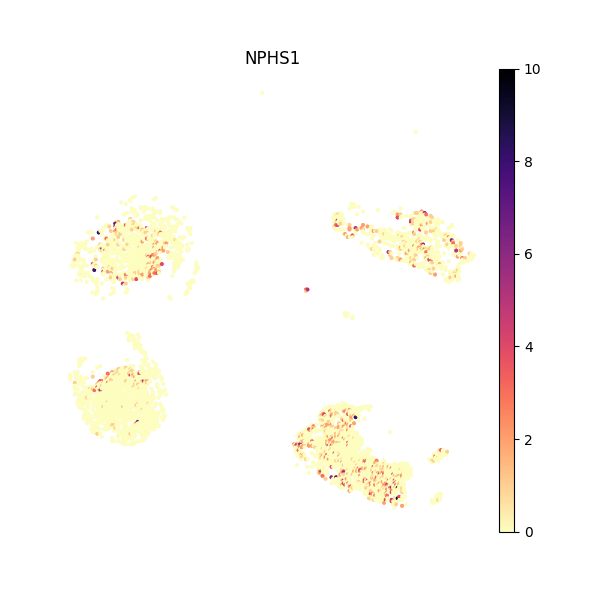

In [6]:
kidney=st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef', bin_size=50)
#kidney= st.io.read_ann_h5ad(input_file_kidney, spatial_key='spatial')
#kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
# preprocessing
kidney.tl.cal_qc()
kidney.tl.filter_cells(
        min_gene=550,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
kidney.tl.filter_genes(min_cell=15)

kidney = st.io.stereo_to_anndata(kidney,flavor='seurat',
                                output='all_kidney_bin50.h5ad')
kidney=ad.read('all_kidney_bin50.h5ad')
sp.pl.spatial_scatter(
    kidney, shape=None,
    color=['NPHS1'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False,save='kidney_NPHS1.png'
)

[2025-03-24 20:00:27][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:27 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef specify block size:75



[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 75025 cells, and 36772 genes.
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1061s.
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0971s.
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:30][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0156s.
[2025-03-24 20:0

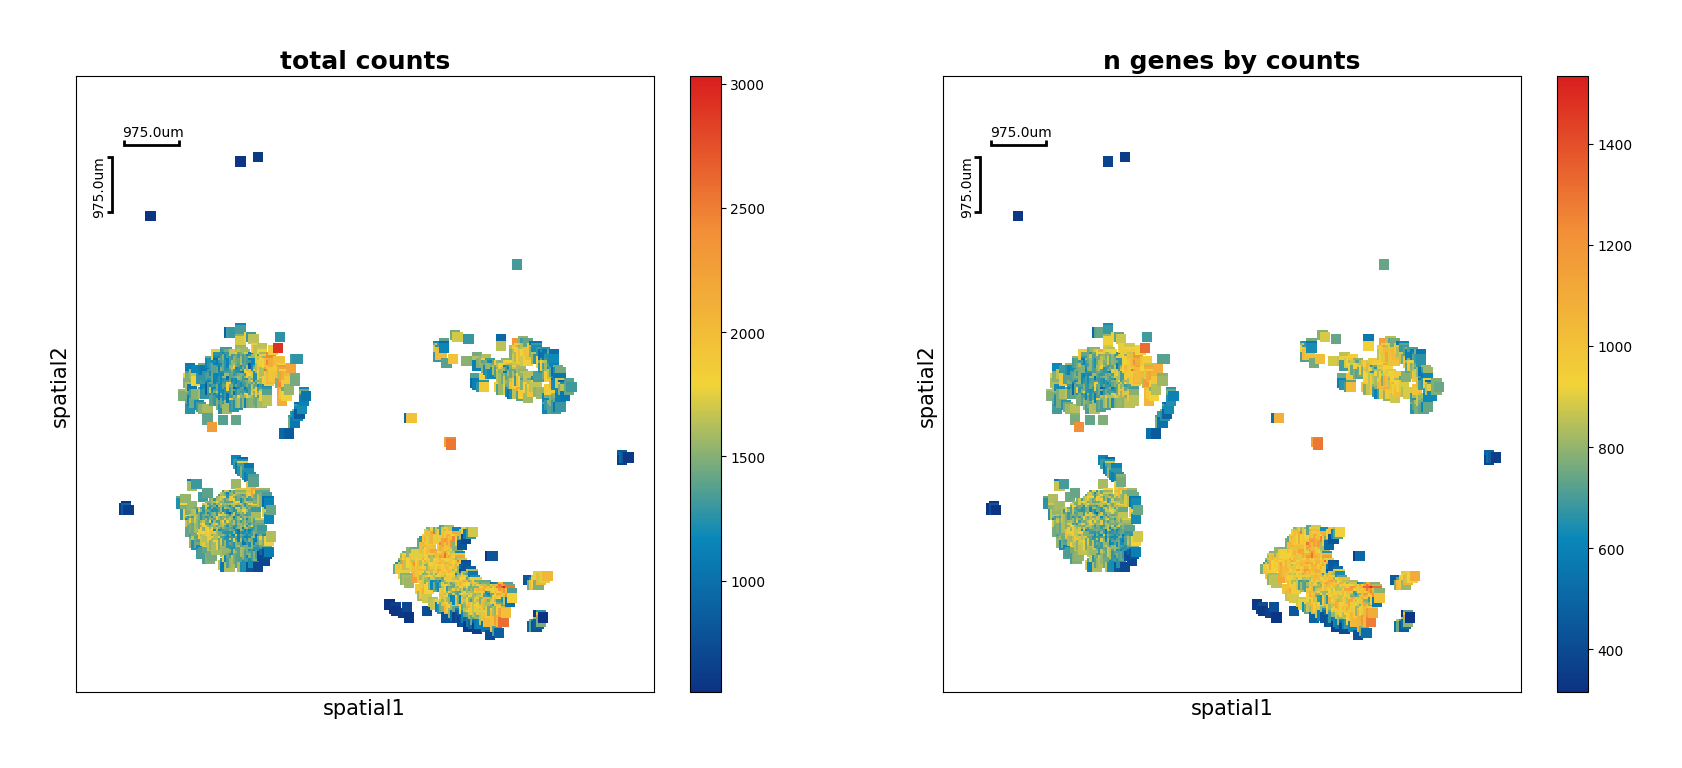

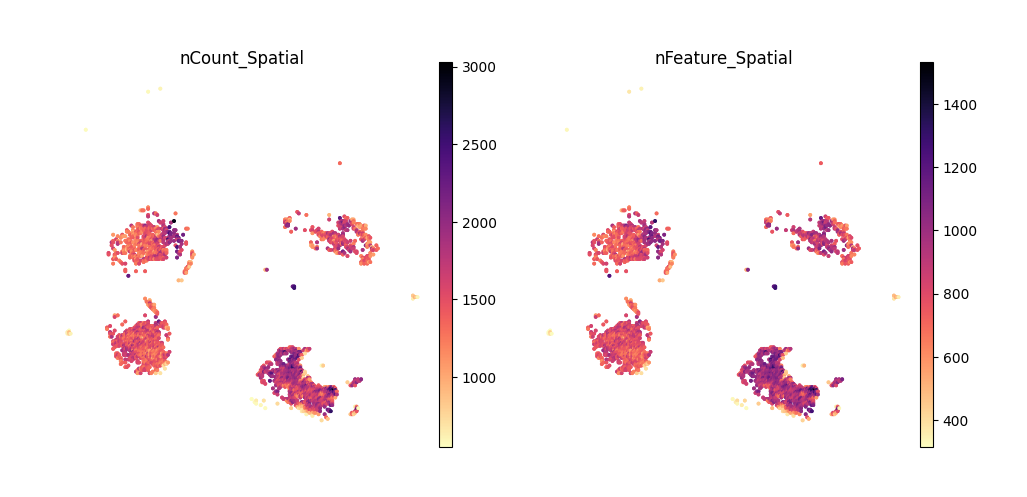

In [11]:
kidney=st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef', bin_size=75)
#kidney= st.io.read_ann_h5ad(input_file_kidney, spatial_key='spatial')
#kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
# preprocessing
kidney.tl.cal_qc()
kidney.tl.filter_cells(
        min_gene=550,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
kidney.tl.filter_genes(min_cell=15)
kidney.plt.spatial_scatter()
kidney = st.io.stereo_to_anndata(kidney,flavor='seurat',
                                output='kidney1_bin75.h5ad')
k=ad.read('kidney1_bin75.h5ad')
sp.pl.spatial_scatter(
    k, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="kidney1_bin75.png"
)

[2025-03-24 20:00:31][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:31 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef specify block size:100


[2025-03-24 20:00:32][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 43767 cells, and 36772 genes.
[2025-03-24 20:00:32][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:32][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1039s.
[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0747s.
[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0139s.
[2025-03-24 20:0

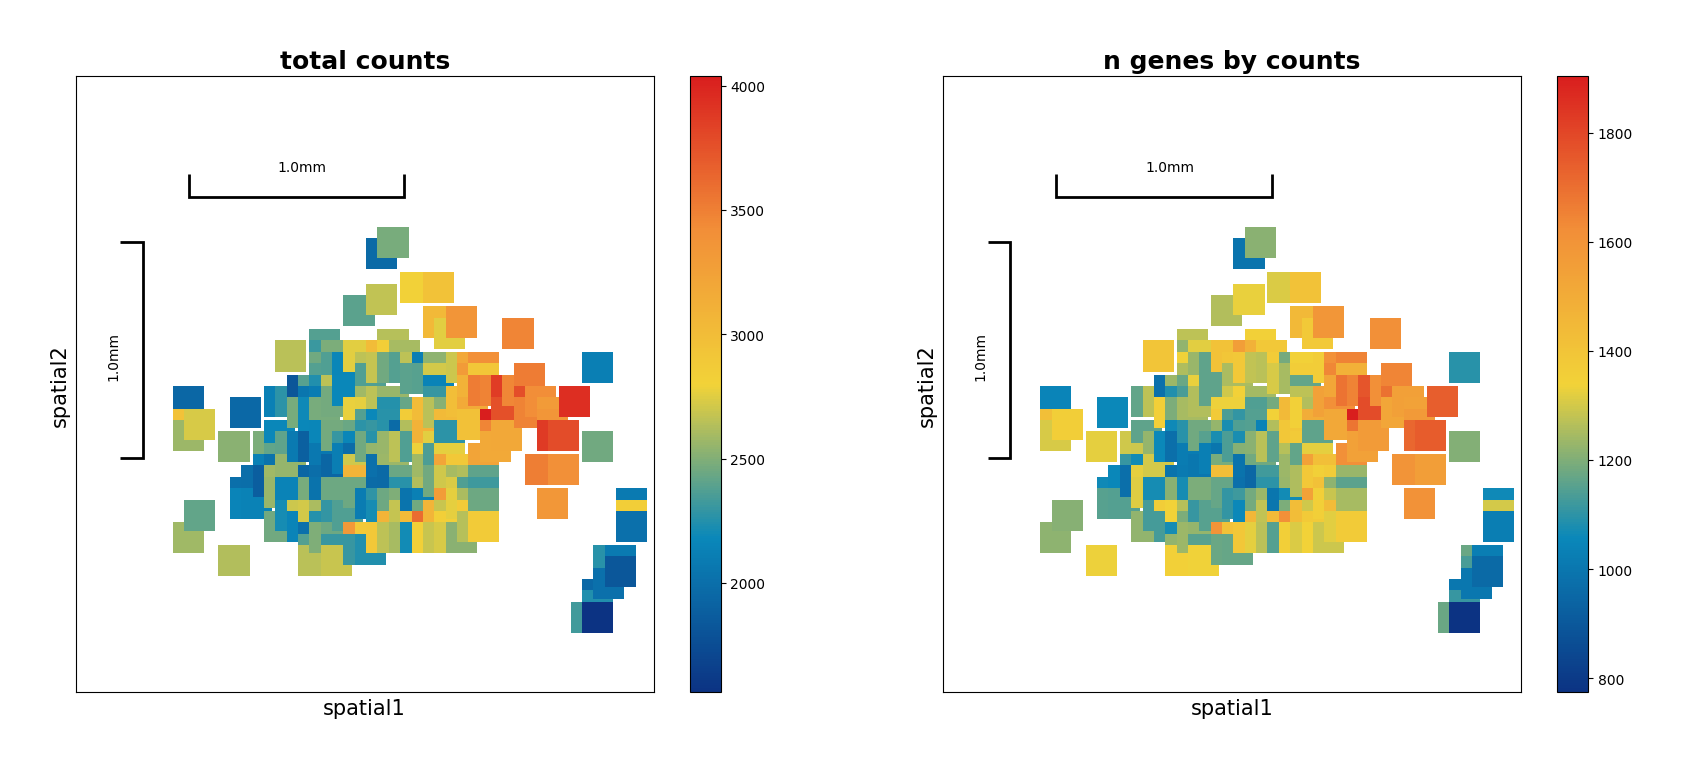

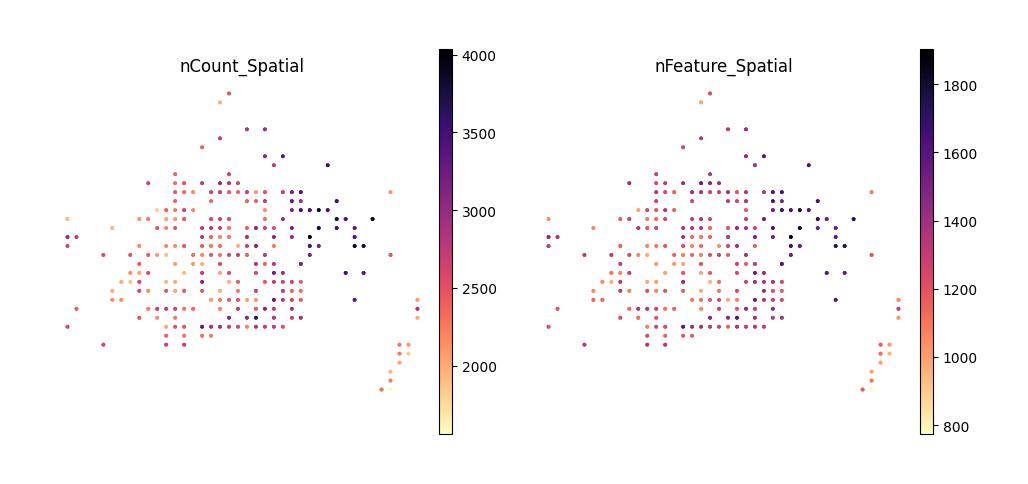

In [12]:
kidney=st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/kidney_transwell/04.tissuecut/A02496F3.gef', bin_size=100)
#kidney= st.io.read_ann_h5ad(input_file_kidney, spatial_key='spatial')
#kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
# preprocessing
kidney.tl.cal_qc()
kidney.tl.filter_cells(
        min_gene=550,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
kidney.tl.filter_genes(min_cell=15)
kidney.tl.filter_coordinates(min_x=5500, max_x=11000,min_y=7000,max_y=11500)
kidney.plt.spatial_scatter()
kidney = st.io.stereo_to_anndata(kidney,flavor='seurat',
                                output='kidney1_bin100.h5ad')
k=ad.read('kidney1_bin100.h5ad')
sp.pl.spatial_scatter(
    k, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="kidney1_bin100.png"
)

## Cartilage 

[2025-03-24 20:00:33][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:33 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef specify block size:50


[2025-03-24 20:00:36][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 169585 cells, and 40306 genes.
[2025-03-24 20:00:36][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:36][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:36][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1785s.
[2025-03-24 20:00:36][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:37][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1490s.
[2025-03-24 20:00:37][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:37][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0579s.
[2025-03-24 20:

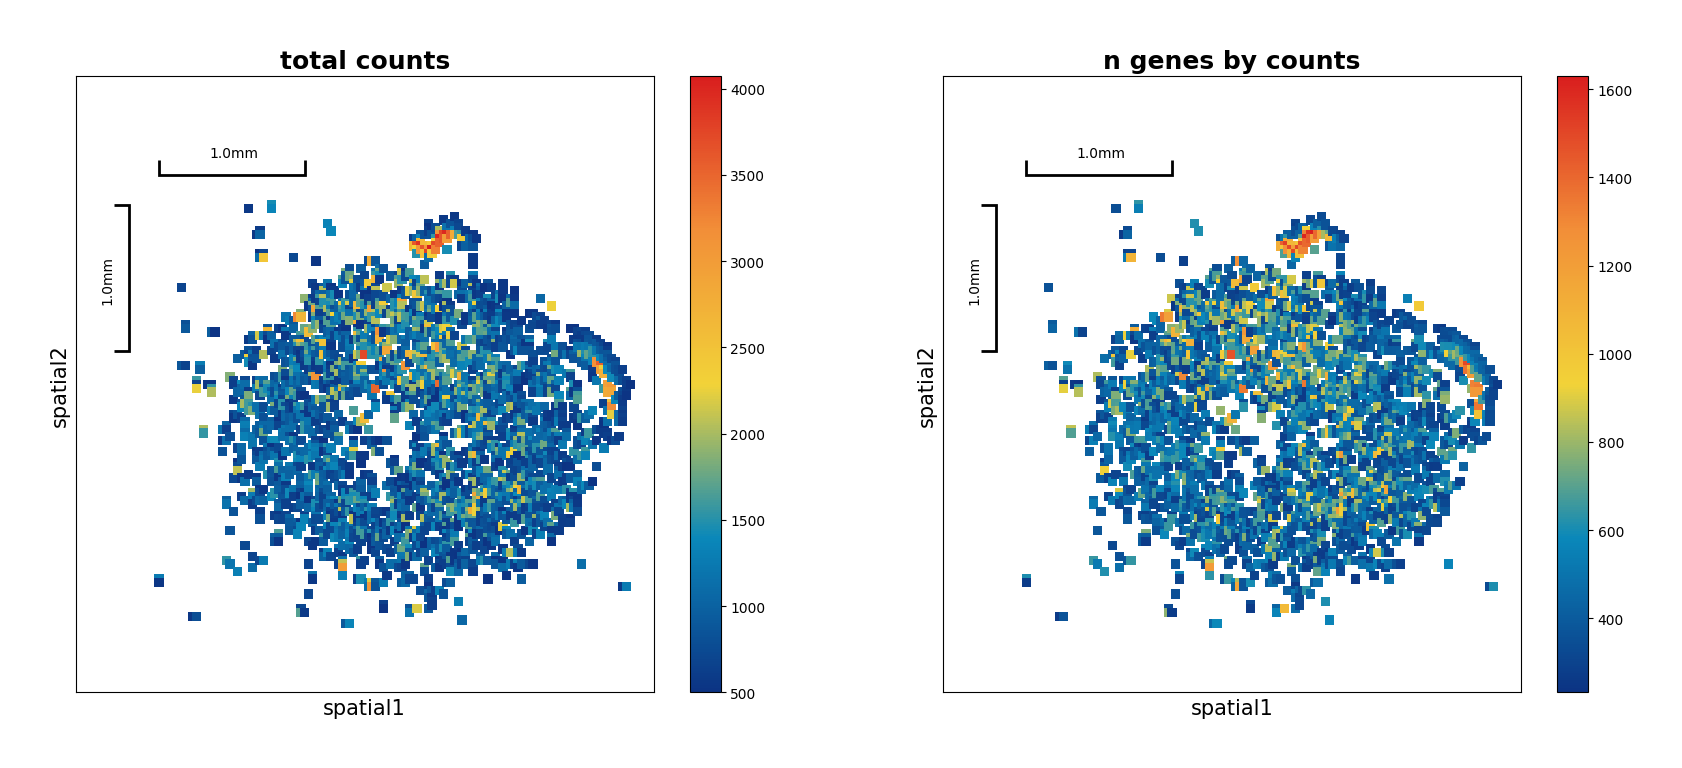

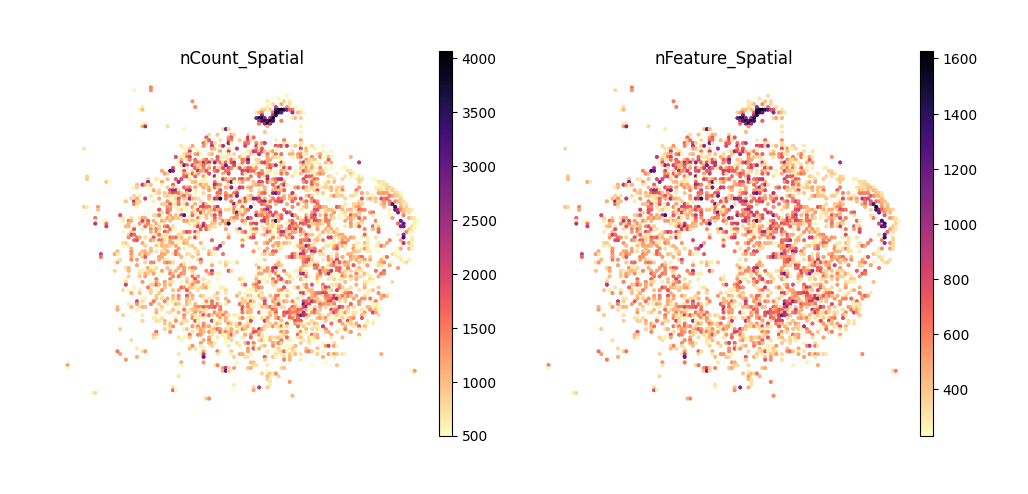

In [13]:
cartilage = st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef', bin_size=50)


cartilage.tl.cal_qc()
cartilage.tl.filter_cells(
        min_gene=500,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
cartilage.tl.filter_genes(min_cell=15)
cartilage.tl.filter_coordinates(min_x=12500, max_x=19500,min_y=14200,max_y=20200)
cartilage.plt.spatial_scatter()# only for gaussian_smooth_scatter_by_gene
cartilage = st.io.stereo_to_anndata(cartilage,
                                flavor='seurat',
                                output='cartilage1_bin50.h5ad')
c=ad.read('cartilage1_bin50.h5ad')
sp.pl.spatial_scatter(
    c, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="cartilage1_bin50.png"
)

[2025-03-24 20:00:37][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:38 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef specify block size:75
2025-03-24 20:00:42 [INFO   ] generateBinInfo elspaed 6.338537 cpu sec


[2025-03-24 20:00:43][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 81199 cells, and 40306 genes.
[2025-03-24 20:00:43][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1604s.
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1702s.
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:44][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0523s.
[2025-03-24 20:0

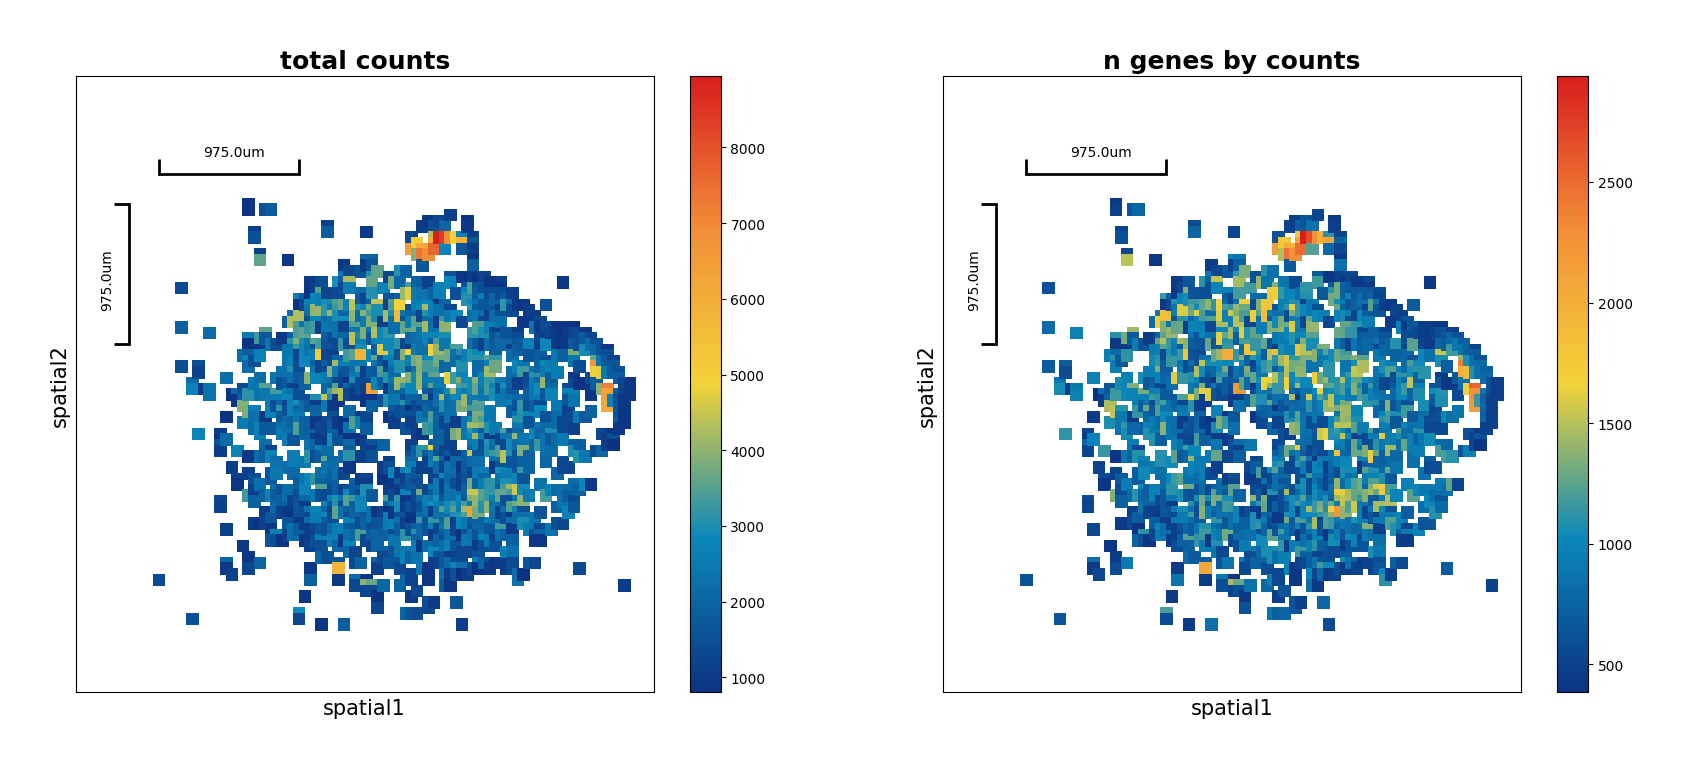

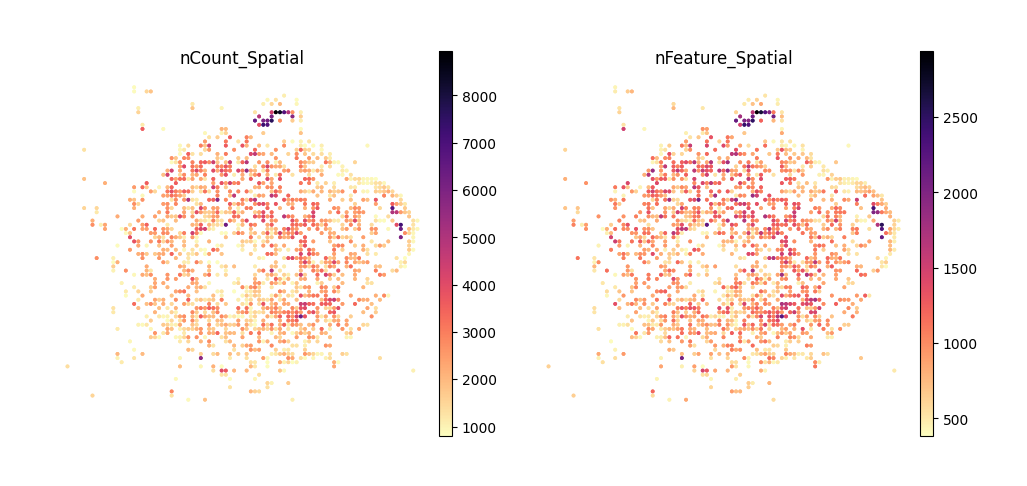

In [14]:
cartilage = st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef', bin_size=75)


cartilage.tl.cal_qc()
cartilage.tl.filter_cells(
        min_gene=800,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
cartilage.tl.filter_genes(min_cell=15)
cartilage.tl.filter_coordinates(min_x=12500, max_x=19500,min_y=14200,max_y=20200)
cartilage.plt.spatial_scatter()# only for gaussian_smooth_scatter_by_gene
cartilage = st.io.stereo_to_anndata(cartilage,flavor='seurat',
                                output='cartilage1_bin75.h5ad')
c=ad.read('cartilage1_bin75.h5ad')
sp.pl.spatial_scatter(
    c, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="cartilage1_bin75.png"
)

[2025-03-24 20:00:45][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:45 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef specify block size:100


[2025-03-24 20:00:47][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 48556 cells, and 40306 genes.
[2025-03-24 20:00:47][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:47][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:48][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1545s.
[2025-03-24 20:00:48][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:48][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1128s.
[2025-03-24 20:00:48][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:48][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0502s.
[2025-03-24 20:0

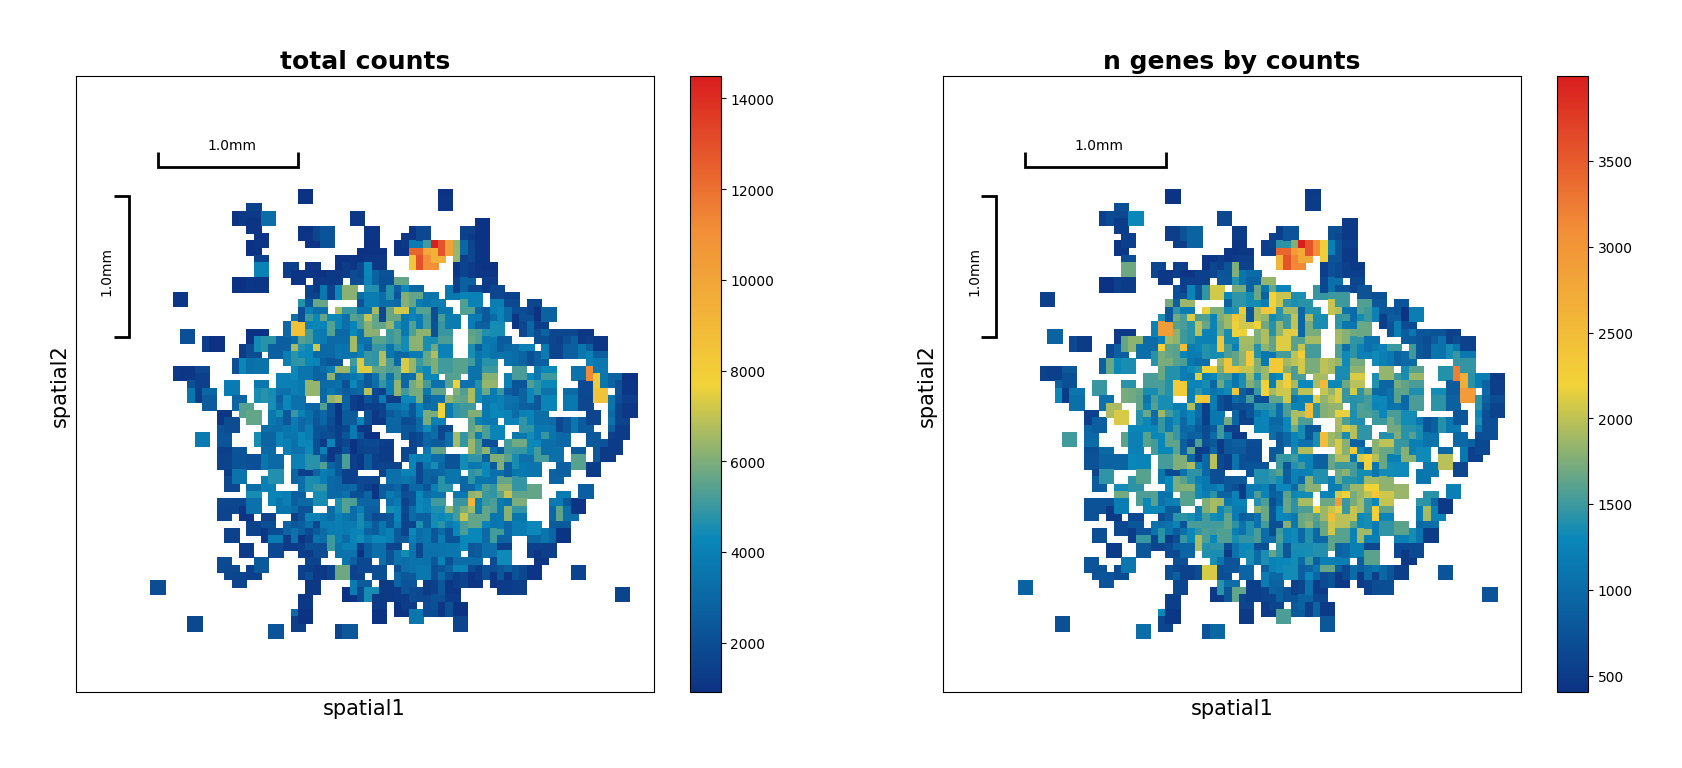

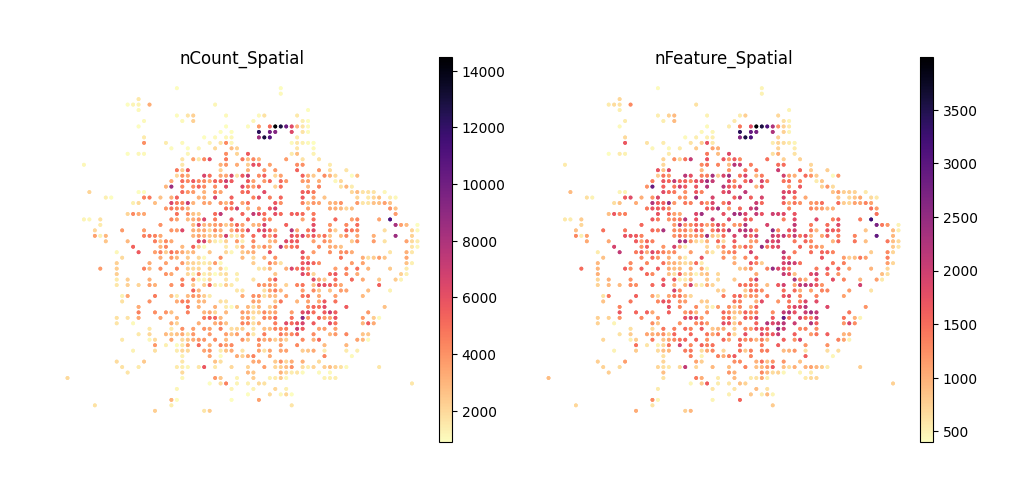

In [15]:
cartilage = st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/cartilage_organoid_v3/04.tissuecut/A02499B3.gef', bin_size=100)


cartilage.tl.cal_qc()
cartilage.tl.filter_cells(
        min_gene=900,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
cartilage.tl.filter_genes(min_cell=15)
cartilage.tl.filter_coordinates(min_x=12500, max_x=19500,min_y=14200,max_y=20200)
cartilage.plt.spatial_scatter()# only for gaussian_smooth_scatter_by_gene
cartilage = st.io.stereo_to_anndata(cartilage,flavor='seurat',
                                output='cartilage1_bin100.h5ad')
c=ad.read('cartilage1_bin100.h5ad')
sp.pl.spatial_scatter(
    c, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="cartilage1_bin100.png"
)

## Brain

[2025-03-24 20:00:49][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:49 [INFO   ] input file:/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef specify block size:50


[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 170542 cells, and 39497 genes.
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1248s.
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0919s.
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:51][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0266s.
[2025-03-24 20:

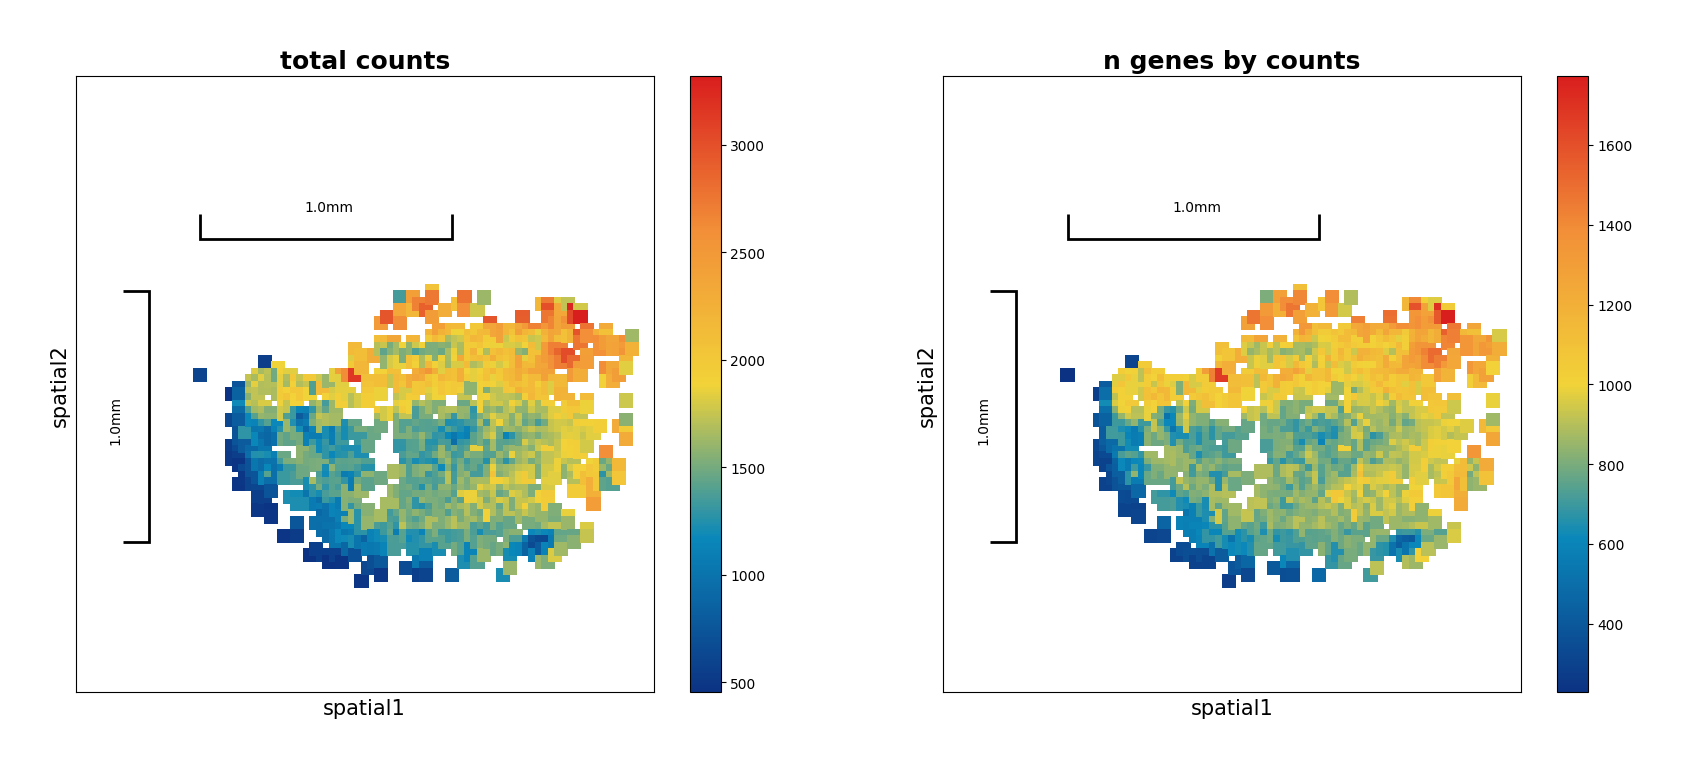

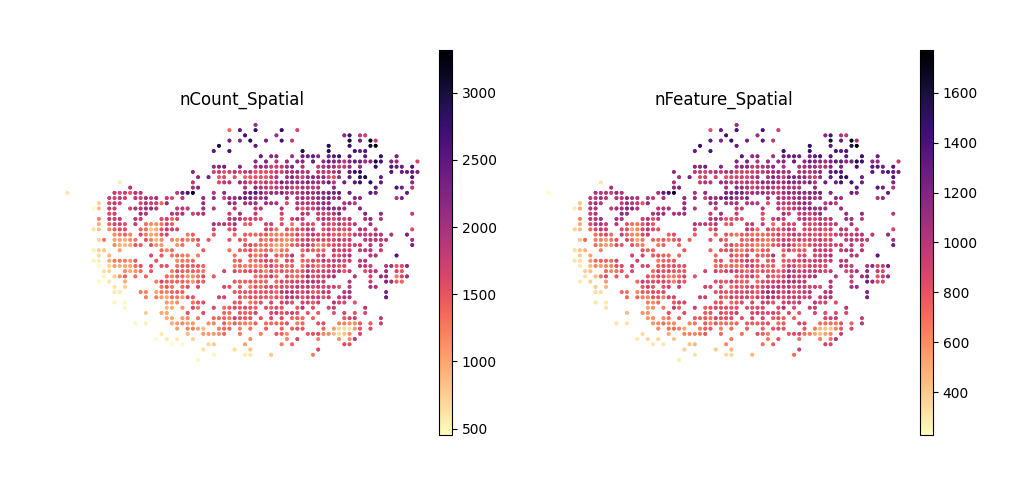

In [16]:
brain = st.io.read_gef('/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef', bin_size=50)

brain.tl.cal_qc()
brain.tl.filter_cells(
        min_gene=450,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
brain.tl.filter_genes(min_cell=15)
brain.tl.filter_coordinates(min_x=8000, max_x=12000,min_y=14000,max_y=18000)

brain.plt.spatial_scatter()
brain = st.io.stereo_to_anndata(brain,flavor='seurat',
                                output='brain1_bin50.h5ad')
b=ad.read('brain1_bin50.h5ad')
sp.pl.spatial_scatter(
    b, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="brain1_bin50.png"
)

[2025-03-24 20:00:52][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:52 [INFO   ] input file:/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef specify block size:75
2025-03-24 20:00:55 [INFO   ] generateBinInfo elspaed 3.047126 cpu sec


[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 80591 cells, and 39497 genes.
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1205s.
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0924s.
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:56][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0227s.
[2025-03-24 20:0

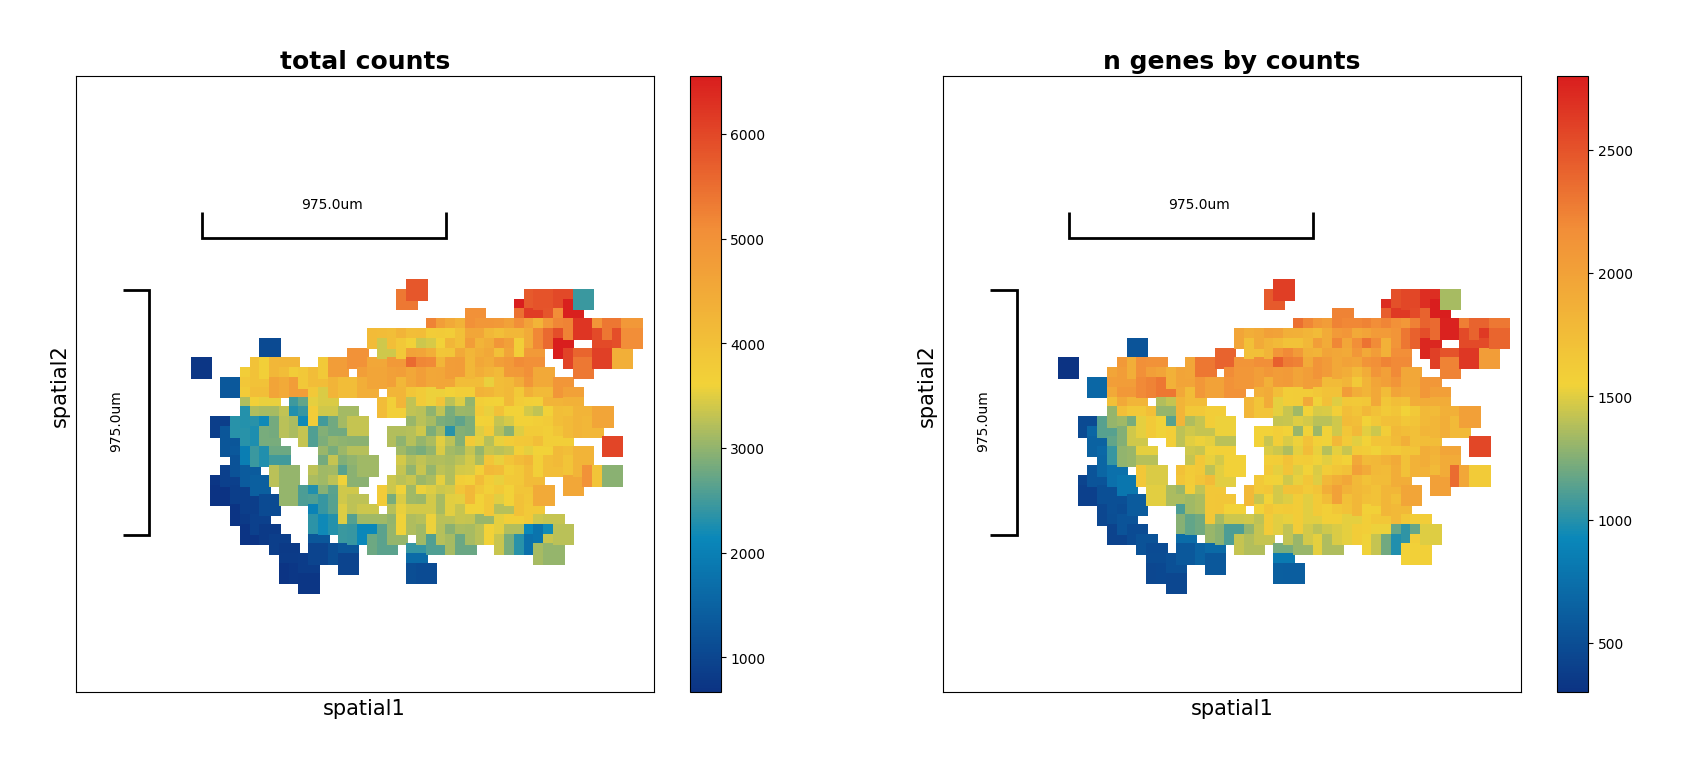

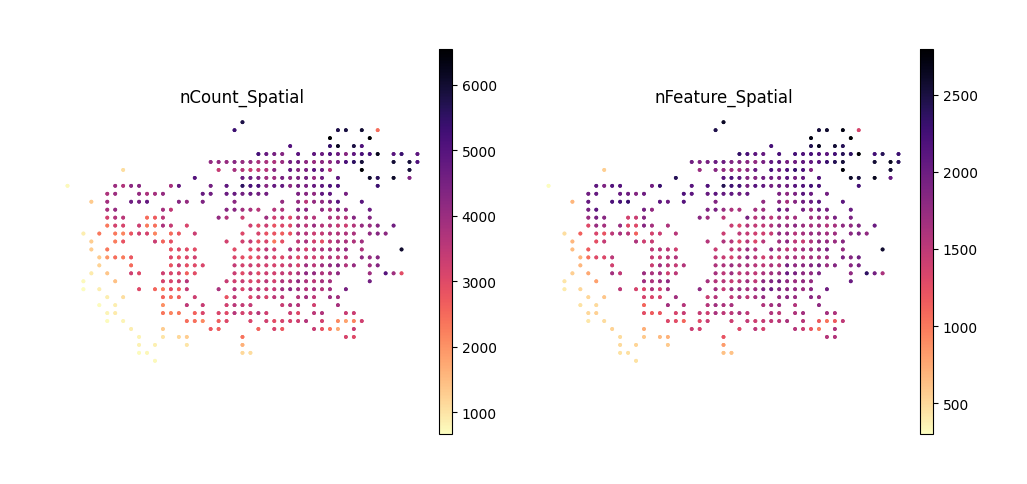

In [17]:
brain = st.io.read_gef('/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef', bin_size=75)

brain.tl.cal_qc()
brain.tl.filter_cells(
        min_gene=650,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
brain.tl.filter_genes(min_cell=15)
brain.tl.filter_coordinates(min_x=8000, max_x=12000,min_y=14000,max_y=18000)

brain.plt.spatial_scatter()
brain = st.io.stereo_to_anndata(brain,flavor='seurat',
                                output='brain1_bin75.h5ad')
b=ad.read('brain1_bin75.h5ad')
sp.pl.spatial_scatter(
    b, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="brain1_bin75.png"
)

[2025-03-24 20:00:57][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:00:57 [INFO   ] input file:/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef specify block size:100


[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 48073 cells, and 39497 genes.
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1116s.
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0782s.
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:00:59][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.0175s.
[2025-03-24 20:0

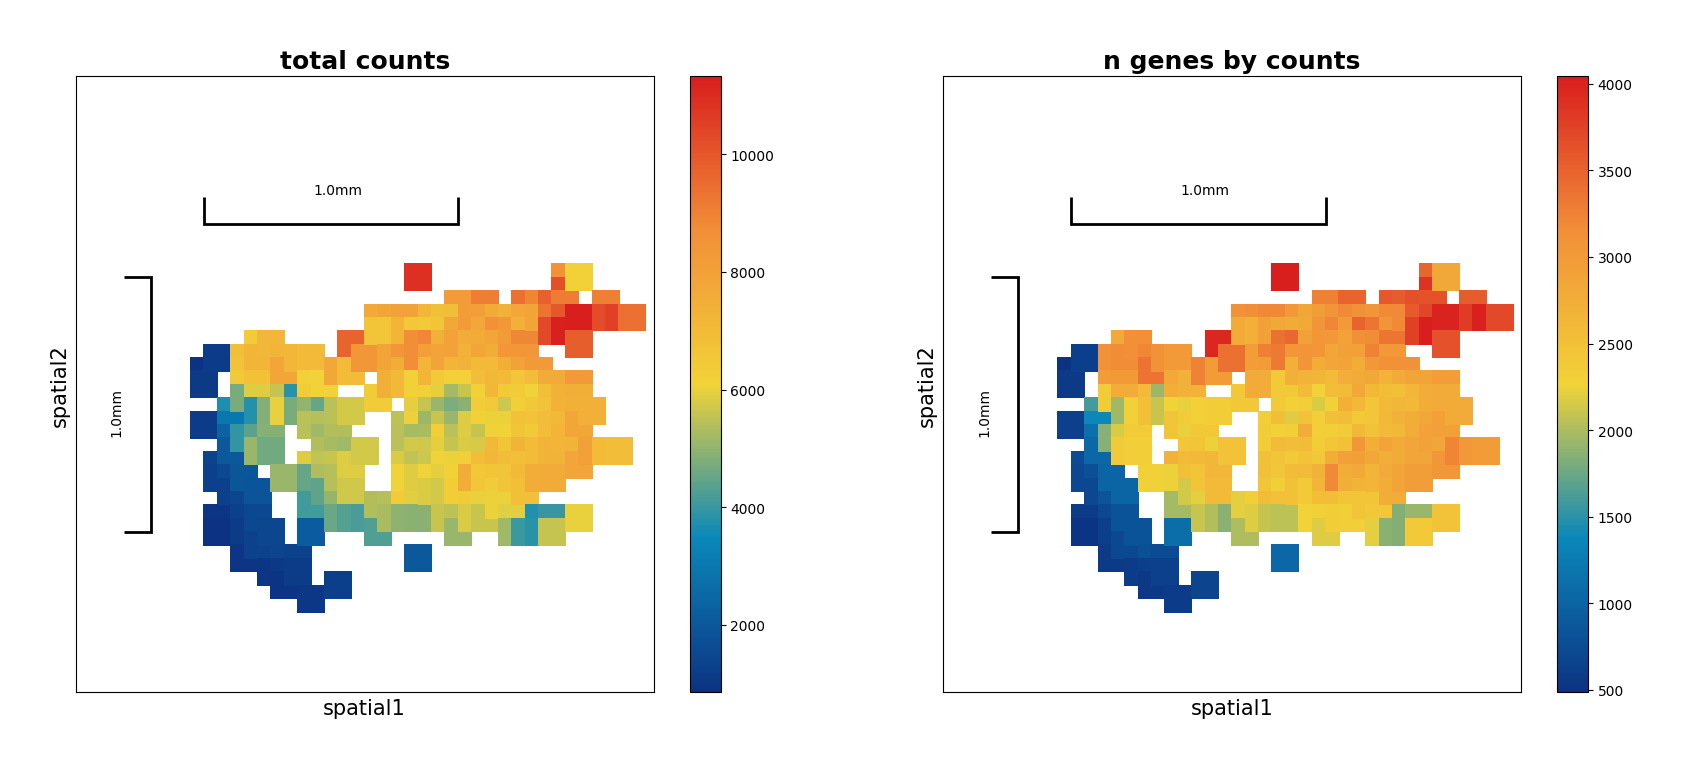

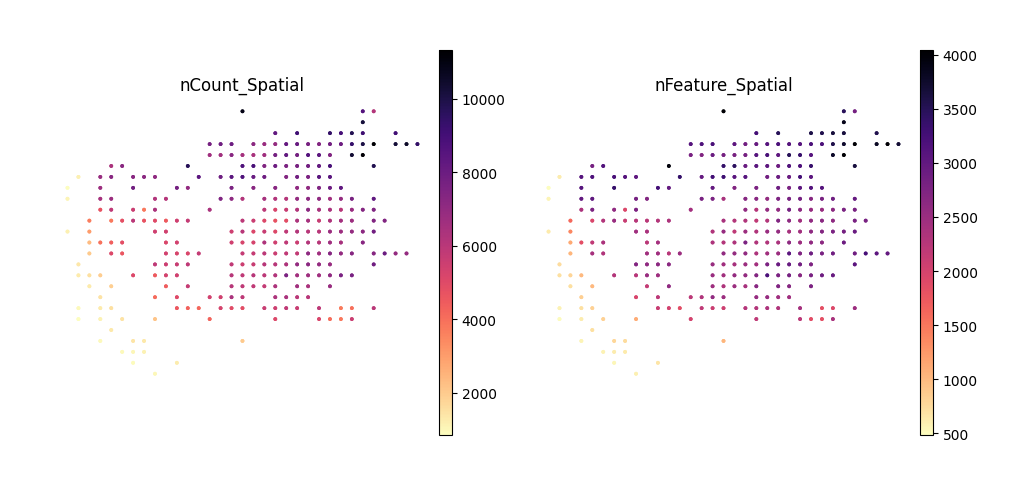

In [18]:
brain = st.io.read_gef('/group/tran3/mnucera/spatial_total/saw_output_stiched_allsamples/04.tissuecut/A02496A1.gef', bin_size=100)

brain.tl.cal_qc()
brain.tl.filter_cells(
        min_gene=850,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
brain.tl.filter_genes(min_cell=15)
brain.tl.filter_coordinates(min_x=8000, max_x=12000,min_y=14000,max_y=18000)

brain.plt.spatial_scatter()
brain = st.io.stereo_to_anndata(brain,flavor='seurat',
                                output='brain1_bin100.h5ad')
b=ad.read('brain1_bin100.h5ad')
sp.pl.spatial_scatter(
    b, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="brain1_bin100.png"
)

[2025-03-24 20:01:00][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:01:00 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef specify block size:50


[2025-03-24 20:01:04][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 180995 cells, and 35209 genes.
[2025-03-24 20:01:04][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:01:04][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:01:04][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.2370s.
[2025-03-24 20:01:04][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:01:05][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1966s.
[2025-03-24 20:01:05][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:01:05][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.1449s.
[2025-03-24 20:

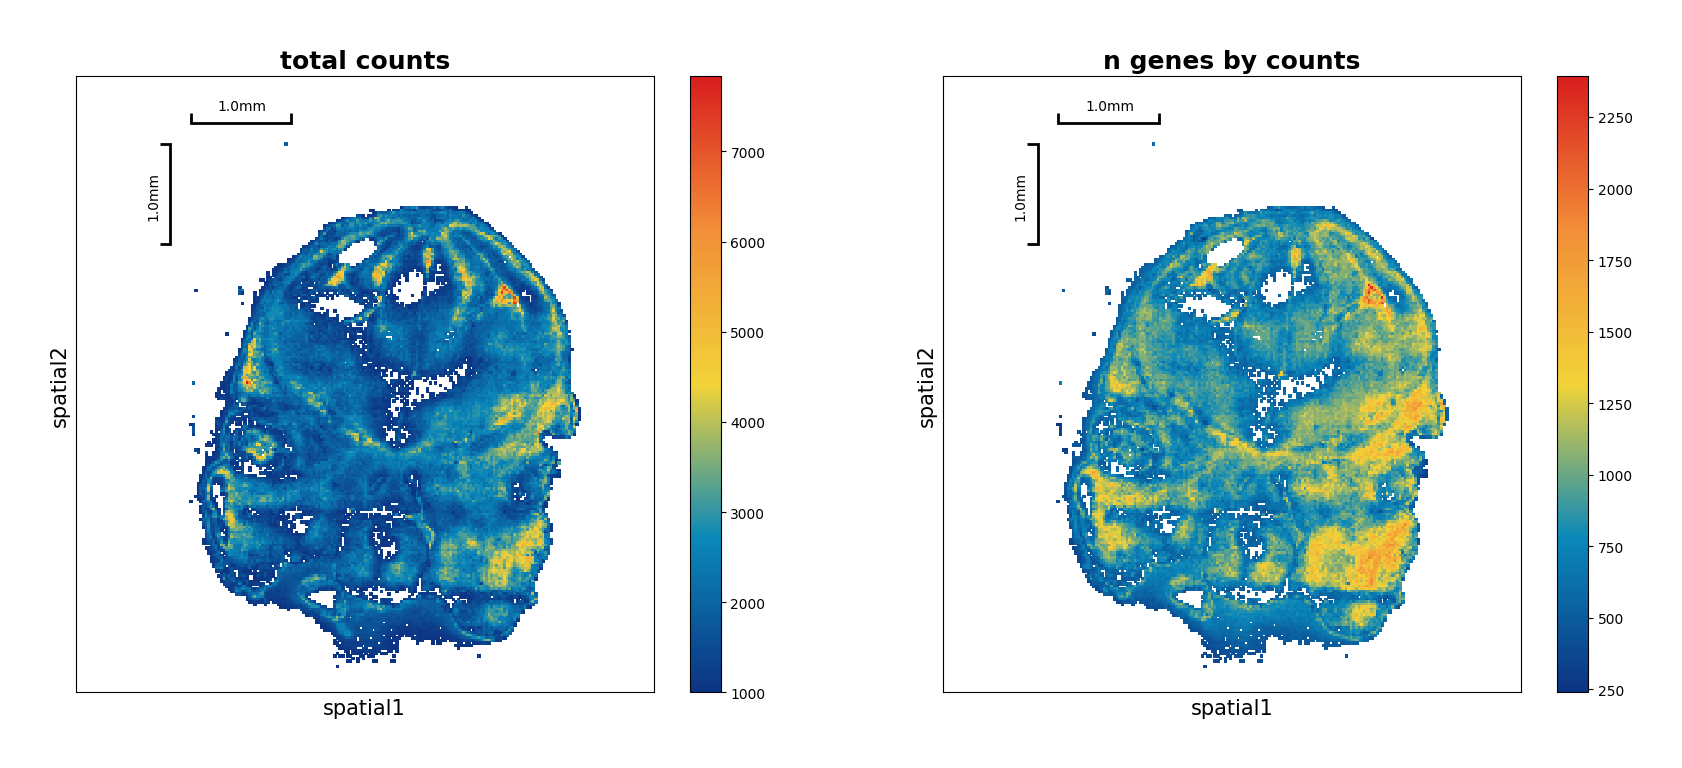

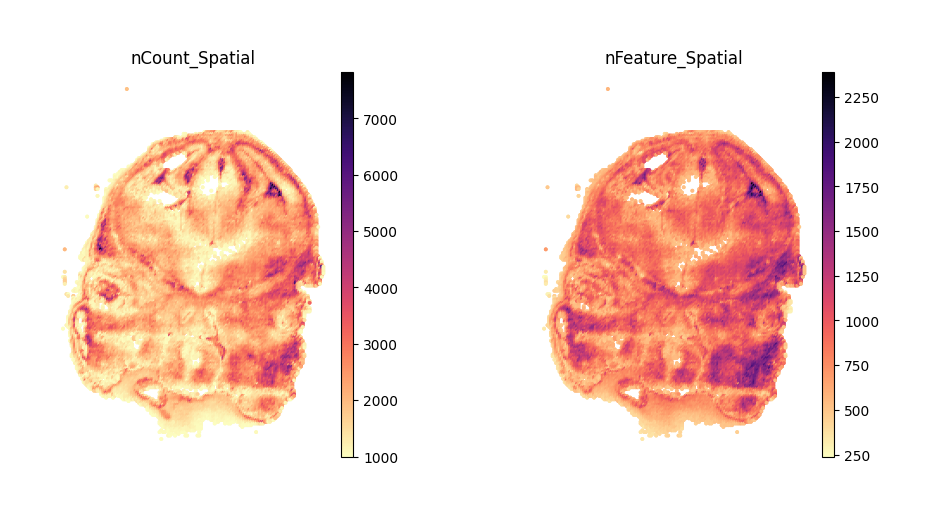

In [19]:
mouse= st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef', bin_size=50)

mouse.tl.cal_qc()
mouse.tl.filter_cells(
        min_gene=1000,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
mouse.tl.filter_genes(min_cell=15)
mouse.tl.filter_coordinates(min_x=8000, max_x=18000,min_y=400,max_y=14000)
mouse.plt.spatial_scatter()
mouse = st.io.stereo_to_anndata(mouse,flavor='seurat',
                                output='mouse1_bin50.h5ad')
m=ad.read('mouse1_bin50.h5ad')
sp.pl.spatial_scatter(
    m, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="mousebrain_bin50.png"
)

[2025-03-24 20:01:07][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:01:07 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef specify block size:75
2025-03-24 20:01:14 [INFO   ] generateBinInfo elspaed 11.509606 cpu sec


[2025-03-24 20:01:17][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 86289 cells, and 35209 genes.
[2025-03-24 20:01:17][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:01:17][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:01:17][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.2022s.
[2025-03-24 20:01:17][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:01:18][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1452s.
[2025-03-24 20:01:18][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:01:18][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.1189s.
[2025-03-24 20:0

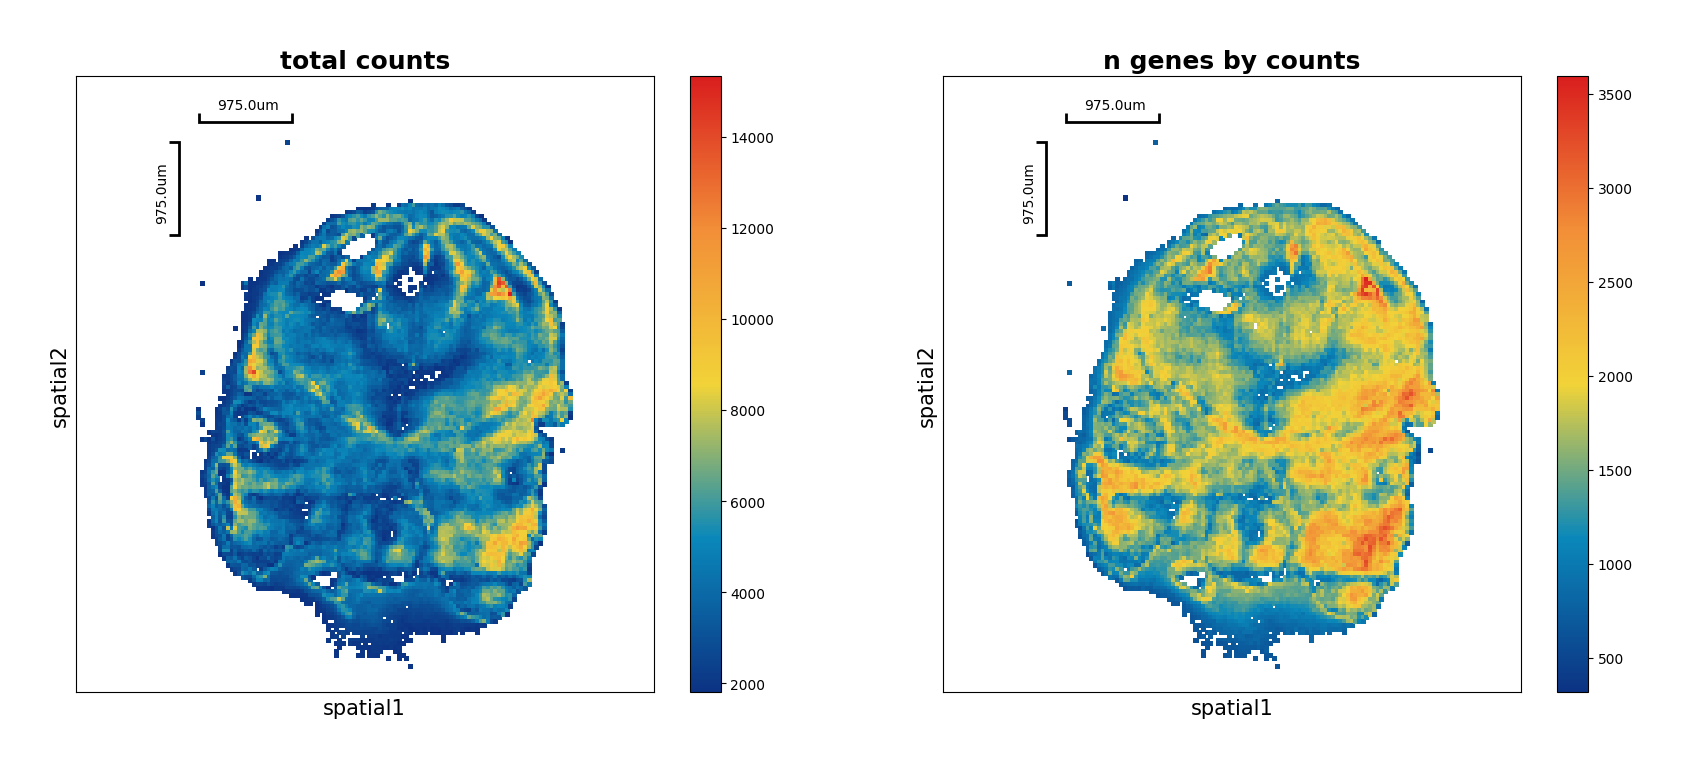

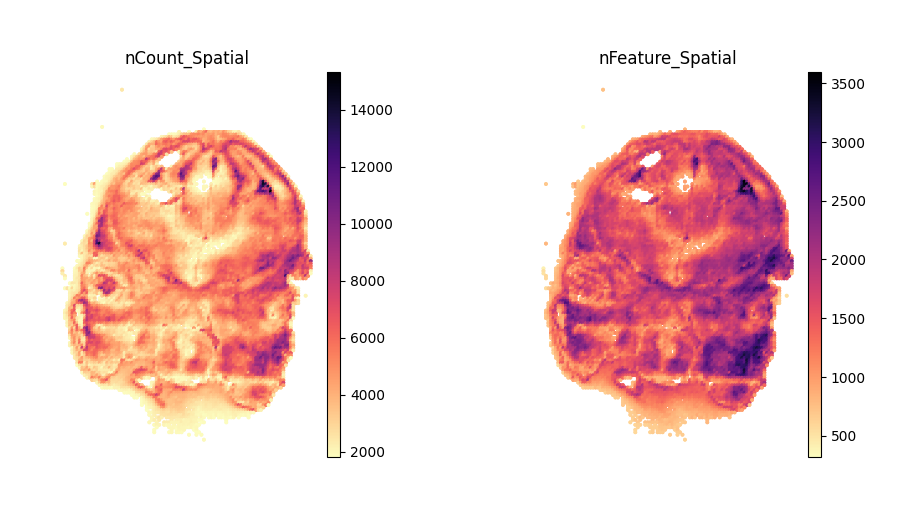

In [20]:
mouse= st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef', bin_size=75)
mouse.tl.cal_qc()
mouse.tl.filter_cells(
        min_gene=1800,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
mouse.tl.filter_genes(min_cell=15)
mouse.tl.filter_coordinates(min_x=8000, max_x=18000,min_y=400,max_y=14000)
mouse.plt.spatial_scatter()
mouse = st.io.stereo_to_anndata(mouse,flavor='seurat',
                                output='mouse1_bin75.h5ad')
m=ad.read('mouse1_bin75.h5ad')
sp.pl.spatial_scatter(
    m, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="mousebrain_bin75.png"
)

[2025-03-24 20:01:20][Stereo][2258576][MainThread][139929035908224][reader][1070][INFO]: read_gef begin ...


2025-03-24 20:01:20 [INFO   ] input file:/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef specify block size:100


[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][reader][1241][INFO]: the matrix has 51458 cells, and 35209 genes.
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][reader][1242][INFO]: read_gef end.
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: cal_qc end, consume time 0.1880s.
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_cells end, consume time 0.1551s.
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][41][INFO]: start to run filter_genes...
[2025-03-24 20:01:24][Stereo][2258576][MainThread][139929035908224][st_pipeline][44][INFO]: filter_genes end, consume time 0.1119s.
[2025-03-24 20:0

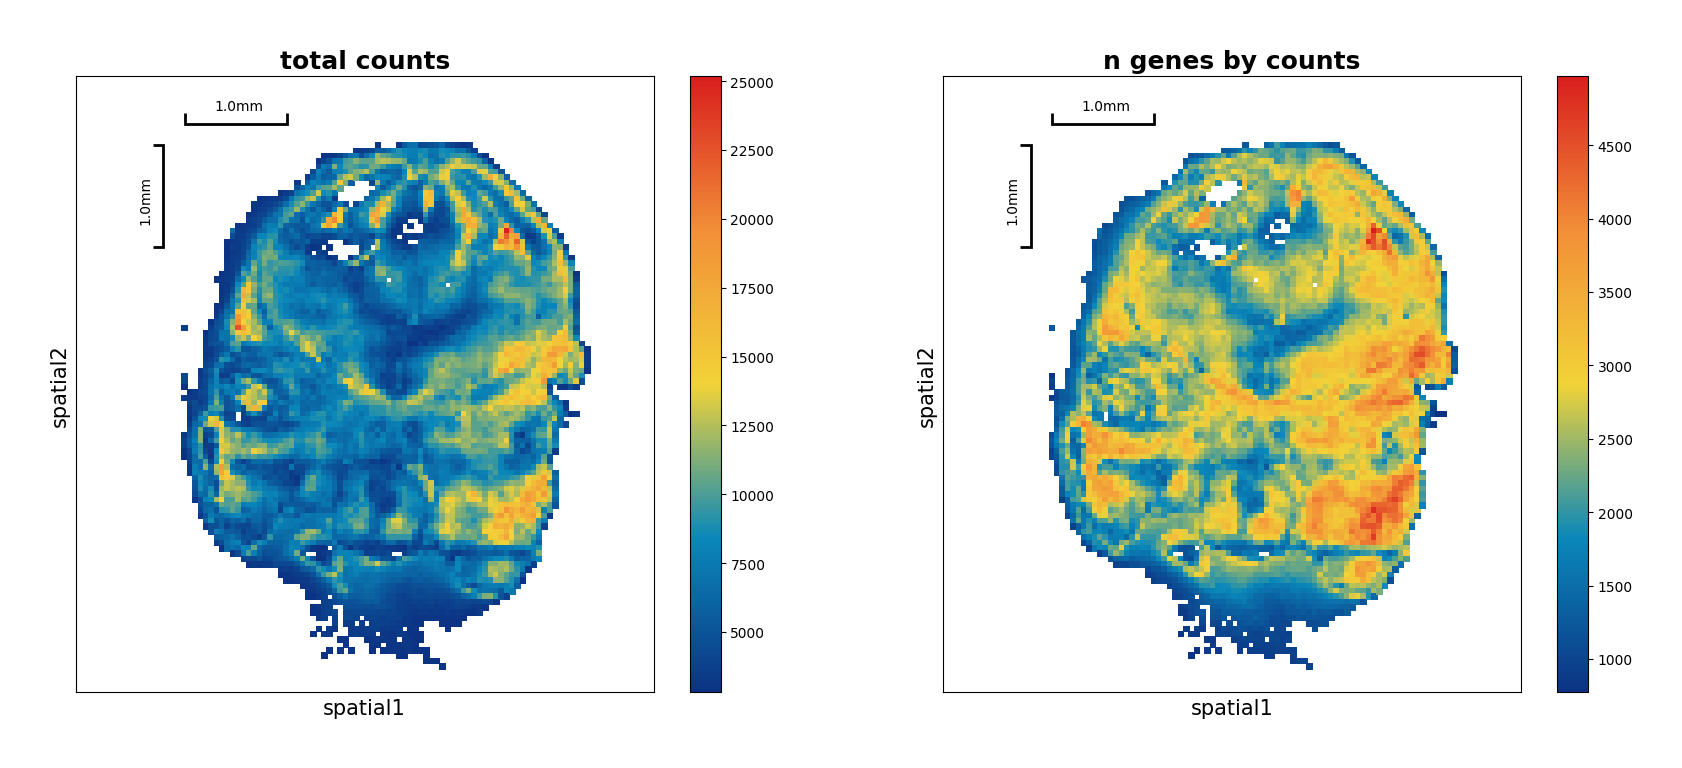

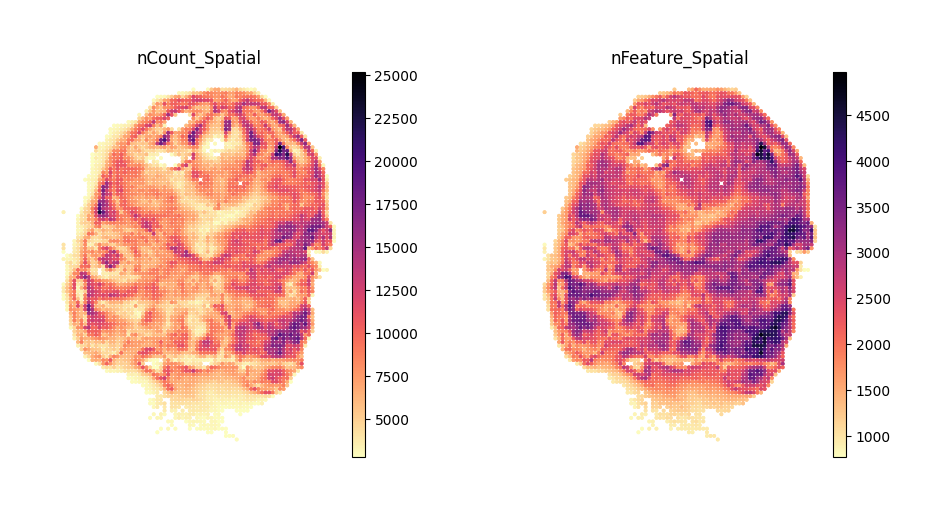

In [21]:
mouse= st.io.read_gef('/group/tran3/NGS/raw-data/BGI_STOmics_grant-08_2023/SAW_outputs/mouse_brain_wt/04.tissuecut/A02499F5.gef', bin_size=100)
mouse.tl.cal_qc()
mouse.tl.filter_cells(
        min_gene=2800,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
mouse.tl.filter_genes(min_cell=15)
mouse.tl.filter_coordinates(min_x=8000, max_x=18000,min_y=400,max_y=14000)
mouse.plt.spatial_scatter()
mouse = st.io.stereo_to_anndata(mouse,flavor='seurat',
                                output='mouse1_bin100.h5ad')
m=ad.read('mouse1_bin100.h5ad')
sp.pl.spatial_scatter(
    m, shape=None,
    color=['nCount_Spatial','nFeature_Spatial'],
    size=30, library_id="spatial", figsize=(5, 5),cmap='magma_r',ncols=2,frameon=False, save="mousebrain_bin100.png"
)

In [22]:
c=ad.read('cartilage1_bin50.h5ad')
sc.pp.calculate_qc_metrics(c)
c1=ad.read('cartilage1_bin75.h5ad')
sc.pp.calculate_qc_metrics(c1)
c2=ad.read('cartilage1_bin100.h5ad')
sc.pp.calculate_qc_metrics(c2)

(                n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 54116587949200                888                 6.790097          1900   
 55405078134100                538                 6.289716          1066   
 55405078135100                558                 6.326149          1169   
 55834574864200                898                 6.801283          2069   
 55834574864700                537                 6.287859          1058   
 ...                           ...                      ...           ...   
 81174881914100                739                 6.606650          1532   
 81604378640800                483                 6.182085           908   
 81604378640900                508                 6.232448          1038   
 81604378641100                669                 6.507278          1384   
 81604378641200                575                 6.356108          1155   
 
                 log1p_total_counts  pct_counts_in_top_50_genes  \
 541165

In [23]:
b=ad.read('brain1_bin50.h5ad')
sc.pp.calculate_qc_metrics(b)
b1=ad.read('brain1_bin75.h5ad')
sc.pp.calculate_qc_metrics(b1)
b2=ad.read('brain1_bin100.h5ad')
sc.pp.calculate_qc_metrics(b2)

(                n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 34789235113200                472                 6.159095           835   
 34789235113300                552                 6.315358          1046   
 34789235113600                621                 6.432940          1119   
 35218731842700                595                 6.390241          1127   
 35218731843500                729                 6.593045          1360   
 ...                           ...                      ...           ...   
 47674137000800               3680                 8.210940         10065   
 47674137001800               2954                 7.991254          6859   
 48103633730400               3893                 8.267192         10346   
 48103633731400               2873                 7.963460          6779   
 48533130460000               3558                 8.177235          9220   
 
                 log1p_total_counts  pct_counts_in_top_50_genes  \
 347892

In [24]:
m=ad.read('mouse1_bin50.h5ad')
sc.pp.calculate_qc_metrics(m)
m1=ad.read('mouse1_bin75.h5ad')
sc.pp.calculate_qc_metrics(m1)
m2=ad.read('mouse1_bin100.h5ad')
sc.pp.calculate_qc_metrics(m2)

(                n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 40802189319700               1176                 7.070724          3477   
 40802189320600                815                 6.704414          4049   
 40802189320700                960                 6.867974          4029   
 40802189320800                888                 6.790097          2886   
 40802189321000                851                 6.747587          3267   
 ...                           ...                      ...           ...   
 73014444040100               1045                 6.952729          3027   
 73014444040200               1275                 7.151485          3298   
 73014444040300               1276                 7.152269          3394   
 73014444040400               1321                 7.186901          3459   
 73014444040500               1135                 7.035269          2843   
 
                 log1p_total_counts  pct_counts_in_top_50_genes  \
 408021

In [25]:
mh=ad.read('mouseheart_bin50.h5ad')
sc.pp.calculate_qc_metrics(mh)
mh1=ad.read('mouseheart_bin75.h5ad')
sc.pp.calculate_qc_metrics(mh1)
mh2=ad.read('mouseheart_bin100.h5ad')
sc.pp.calculate_qc_metrics(mh2)

(                n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 20186346307100                703                 6.556778          1949   
 20186346307200                615                 6.423247          1676   
 20186346307300                649                 6.476972          1653   
 20615843036200                573                 6.352629          1586   
 20615843036300                860                 6.758095          2437   
 ...                           ...                      ...           ...   
 69578470210000                723                 6.584791          1962   
 69578470210100                805                 6.692084          2176   
 69578470210200                536                 6.285998          1355   
 69578470210300                208                 5.342334           398   
 70007966938200                444                 6.098074          1110   
 
                 log1p_total_counts  pct_counts_in_top_50_genes  \
 201863

In [26]:
k=ad.read('kidney1_bin50.h5ad')
sc.pp.calculate_qc_metrics(k)
k1=ad.read('kidney1_bin75.h5ad')
sc.pp.calculate_qc_metrics(k1)
k2=ad.read('kidney1_bin100.h5ad')
sc.pp.calculate_qc_metrics(k2)

(                n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 28346784162500               1007                 6.915723          1894   
 28346784162700               1370                 7.223296          2893   
 28346784162800               1264                 7.142827          2515   
 28346784163700               1194                 7.085901          2547   
 28776280892300               1315                 7.182352          2676   
 ...                           ...                      ...           ...   
 44667659888700                973                 6.881411          2013   
 44667659888800                898                 6.801283          1749   
 45097156617800               1009                 6.917706          1997   
 45097156617900               1245                 7.127694          2763   
 45097156618000                974                 6.882437          1949   
 
                 log1p_total_counts  pct_counts_in_top_50_genes  \
 283467

In [27]:
import pandas as pd

In [28]:
c.obs['rep']='bin 50'
c1.obs['rep']='bin 75'
c2.obs['rep']='bin 100'
ct=ad.concat([c,c1,c2])
dfsingle=pd.DataFrame(ct.obs['rep'].value_counts())
dfsingle['bin_size']=dfsingle.index
dfsingle

count bin_size
rep                    
bin 50    2698   bin 50
bin 75    1467   bin 75
bin 100    987  bin 100

In [29]:
list(dfsingle.index)

['bin 50', 'bin 75', 'bin 100']

In [30]:
rep = dfsingle.index
ax=sns.catplot(y=list(dfsingle.index),x='bin_size',data=dfsingle,kind='bar',
              palette=['orange','red','darkred'])

             
#formatter = FuncFormatter(millions)
#ax.ax.yaxis.set_major_formatter(formatter)

# Label and ticks formatting
plt.ylabel('Number of bins', fontsize=15, labelpad=15)
ax.fig.set_size_inches(4,4)
plt.xlabel(" ",fontsize=18,labelpad=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of of bins per sample at different bin sizes \n in cartilage organoids',fontsize=18)
#plt.savefig('Number_of_reads_in_each_chip.png',dpi=300)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
b.obs['rep']='bin 50'
b1.obs['rep']='bin 75'
b2.obs['rep']='bin 100'
bt=ad.concat([b,b1,b2])
dfsingle=pd.DataFrame(bt.obs['rep'].value_counts())
dfsingle['bin_size']=dfsingle.index
dfsingle

In [ ]:
ax=sns.catplot(y='rep',x='bin_size',data=dfsingle,kind='bar',
              palette=['orange','red','darkred'])

             
#formatter = FuncFormatter(millions)
#ax.ax.yaxis.set_major_formatter(formatter)

# Label and ticks formatting
plt.ylabel('Number of bins', fontsize=15, labelpad=15)
ax.fig.set_size_inches(4,4)
plt.xlabel(" ",fontsize=18,labelpad=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of of bins per sample at different bin sizes \n in brain organoids',fontsize=18)
#plt.savefig('Number_of_reads_in_each_chip.png',dpi=300)
plt.show()

In [ ]:
k.obs['rep']='bin 50'
k1.obs['rep']='bin 75'
k2.obs['rep']='bin 100'
kt=ad.concat([k,k1,k2])
dfsingle=pd.DataFrame(kt.obs['rep'].value_counts())
dfsingle['bin_size']=dfsingle.index
dfsingle

In [ ]:
ax=sns.catplot(y='rep',x='bin_size',data=dfsingle,kind='bar',
              palette=['orange','red','darkred'])

             
#formatter = FuncFormatter(millions)
#ax.ax.yaxis.set_major_formatter(formatter)

# Label and ticks formatting
plt.ylabel('Number of bins', fontsize=15, labelpad=15)
ax.fig.set_size_inches(4,4)
plt.xlabel(" ",fontsize=18,labelpad=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of of bins per sample at different bin sizes \n in kidney organoids',fontsize=18)
#plt.savefig('Number_of_reads_in_each_chip.png',dpi=300)
plt.show()

In [ ]:
m.obs['rep']='bin 50'
m1.obs['rep']='bin 75'
m2.obs['rep']='bin 100'
mt=ad.concat([m,m1,m2])
dfsingle=pd.DataFrame(mt.obs['rep'].value_counts())
dfsingle['bin_size']=dfsingle.index
dfsingle

In [ ]:
ax=sns.catplot(y='rep',x='bin_size',data=dfsingle,kind='bar',
              palette=['orange','red','darkred'])

             
#formatter = FuncFormatter(millions)
#ax.ax.yaxis.set_major_formatter(formatter)

# Label and ticks formatting
plt.ylabel('Number of bins', fontsize=15, labelpad=15)
ax.fig.set_size_inches(4,4)
plt.xlabel(" ",fontsize=18,labelpad=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of of bins at different bin sizes \n in mouse head tissue',fontsize=18)
#plt.savefig('Number_of_reads_in_each_chip.png',dpi=300)
plt.show()

In [ ]:
mh.obs['rep']='bin 50'
mh1.obs['rep']='bin 75'
mh2.obs['rep']='bin 100'
mt=ad.concat([mh,mh1,mh2])
dfsingle=pd.DataFrame(mt.obs['rep'].value_counts())
dfsingle['bin_size']=dfsingle.index
dfsingle

In [ ]:
ax=sns.catplot(y='rep',x='bin_size',data=dfsingle,kind='bar',
              palette=['orange','red','darkred'])

             
#formatter = FuncFormatter(millions)
#ax.ax.yaxis.set_major_formatter(formatter)

# Label and ticks formatting
plt.ylabel('Number of bins', fontsize=15, labelpad=15)
ax.fig.set_size_inches(4,4)
plt.xlabel(" ",fontsize=18,labelpad=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.title('Number of of bins at different bin sizes \n in mouse heart tissue',fontsize=18)
#plt.savefig('Number_of_reads_in_each_chip.png',dpi=300)
plt.show()

### Look at distirbutions of genes per bin size across different organoids

In [ ]:
##Create a dataframe of all the information we want

genes_per_bin = pd.DataFrame(columns=['genes_per_bin','bin_size'],index=['mouse head tissue bin 50','mouse head tissue bin 75','mouse head tissue bin 100',
                                                                         'mouse heart tissue bin 50', 'mouse heart tissue bin 75', 'mouse heart tissue bin 100',
                                                                         'brain organoid bin 50', 'brain organoid bin 75', 'brain organoid bin 100',
                                                                         'cartilage organoid bin 50', 'cartilage organoid bin 75','cartilage organoid bin 100' ] )
genes_per_bin

In [31]:
##Add bin size to each organoid dataframe - mouse heart
mh.obs['bin_size'] = 50
mh.obs['tissue'] = 'mouse heart tissue'
mh1.obs['bin_size'] = 75
mh1.obs['tissue'] = 'mouse heart tissue'
mh2.obs['bin_size'] = 100
mh2.obs['tissue'] = 'mouse heart tissue'

## Cartilage
c.obs['bin_size'] = 50
c.obs['tissue'] = 'cartilage organoid'
c1.obs['bin_size'] = 75
c1.obs['tissue'] = 'cartilage organoid'
c2.obs['bin_size'] = 100
c2.obs['tissue'] = 'cartilage organoid'

## Mouse head
m.obs['bin_size'] = 50
m.obs['tissue'] = 'mouse head tissue'
m1.obs['bin_size'] = 75
m1.obs['tissue'] = 'mouse head tissue'
m2.obs['bin_size'] = 100
m2.obs['tissue'] = 'mouse head tissue'

## brain organoid
b.obs['bin_size'] = 50
b.obs['tissue'] = 'brain organoid'
b1.obs['bin_size'] = 75
b1.obs['tissue'] = 'brain organoid'
b2.obs['bin_size'] = 100
b2.obs['tissue'] = 'brain organoid'

In [32]:
## Create a merged ann data object
merged_adata = ad.concat([mh,mh1,mh2,c,c1,c2,m,m1,m2,b,b1,b2],join="outer")

In [33]:
merged_adata.obs

nCount_Spatial  nFeature_Spatial  percent.mito orig.ident  \
20186346307050             446               206      8.295964     sample   
20186346307150             561               252      8.912656     sample   
20186346307300             456               224      7.456140     sample   
20401094671900             680               294      5.441176     sample   
20401094672050             454               210      9.471366     sample   
...                        ...               ...           ...        ...   
47674137000800           10223              3804      4.705077     sample   
47674137001800            6959              3038      4.857020     sample   
48103633730400           10512              4018      4.309361     sample   
48103633731400            6908              2978      4.820498     sample   
48533130460000            9405              3701      4.593301     sample   

                    x      y  bin_size              tissue  rep  
20186346307050   4700  15850        50  mouse heart tissue  NaN  
20186346307150   4700  15950        50  mouse heart tissue  NaN  
20186346307300   4700  16100        50  mouse heart tissue  NaN  
20401094671900   4750  15900        50  mouse heart tissue  NaN  
20401094672050   4750  16050        50  mouse heart tissue  NaN  
...               ...    ...       ...                 ...  ...  
47674137000800  11100  15200       100      brain organoid  NaN  
47674137001800  11100  16200       100      brain organoid  NaN  
48103633730400  11200  15200       100      brain organoid  NaN  
48103633731400  11200  16200       100      brain organoid  NaN  
48533130460000  11300  15200       100      brain organoid  NaN  

[99959 rows x 9 columns]

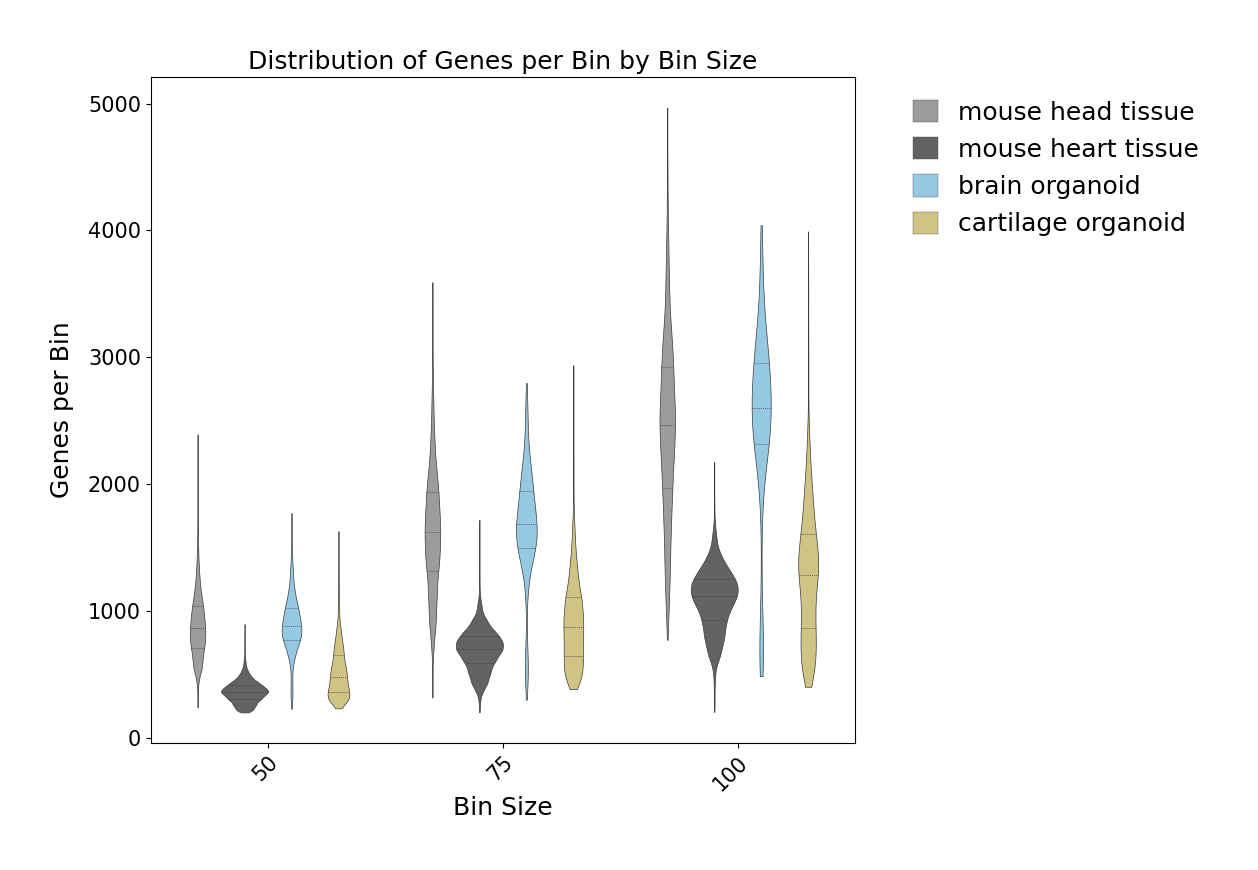

In [36]:
 import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##Do a joint violin plot
# Extract the necessary data
data = []
Tol_muted =['#9c9c9c','#636363','#88CCEE','#DDCC77']
tissue = ['mouse head tissue','mouse heart tissue','brain organoid','cartilage organoid']
for dataset_idx in tissue:
    # Extract dataset-specific obs
    ds_obs = merged_adata[merged_adata.obs['tissue'] == dataset_idx].obs
    # Get bin_size and genes_per_cell for each cell
    bin_size = ds_obs['bin_size'].values
    genes_per_cell = ds_obs['nFeature_Spatial'].values  # Assuming genes per cell is stored as 'n_genes'
    
    # Create DataFrame for this dataset
    temp_df = pd.DataFrame({
        'bin_size': bin_size,
        'genes_per_cell': genes_per_cell,
        'dataset': f'{dataset_idx}'
    })
    data.append(temp_df)

# Combine all datasets
plot_df = pd.concat(data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='bin_size', y='genes_per_cell', hue='dataset', 
               data=plot_df, split=False, inner='quartile',
               palette=['#9c9c9c','#636363','#88CCEE', '#DDCC77'], cut=0)

# Adjust only the x-ticks to show 50, 75, 100
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.title('Distribution of Genes per Bin by Bin Size',fontsize=18)
plt.xlabel('Bin Size',fontsize=18,labelpad=1)
plt.ylabel('Genes per Bin',fontsize=18,labelpad=10)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.tight_layout()
plt.savefig("genes_per_bin_by_bin_size.pdf",format="pdf",bbox_inches="tight")
plt.show()


In [ ]:
plt.savefig("genes_per_bin_by_bin_size.png",dpi=300,bbox_inches="tight")


In [ ]:
m.obs['nFeature_Spatial']

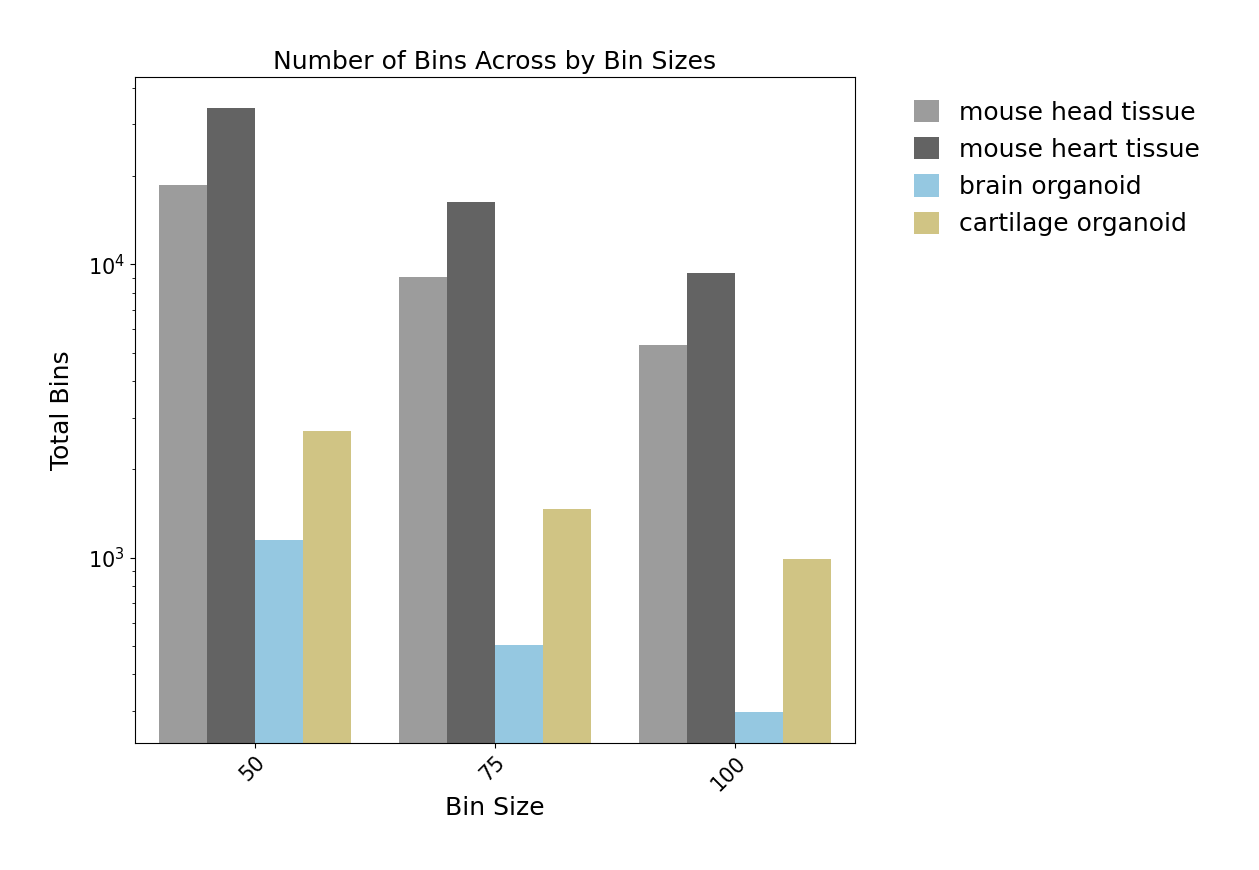

In [37]:
 import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

##Do a joint violin plot
# Extract the necessary data
data = []
Tol_muted =['#9c9c9c','#636363','#88CCEE','#DDCC77']
tissue = ['mouse head tissue','mouse heart tissue','brain organoid','cartilage organoid']
for dataset_idx in tissue:
    ds_obs = merged_adata[merged_adata.obs['tissue'] == dataset_idx].obs
    
    # Count the number of bins (rows) for each bin_size
    grouped = ds_obs.groupby('bin_size').size().reset_index(name='bin_count')
    
    # Create DataFrame with bin counts for this dataset
    temp_df = pd.DataFrame({
        'bin_size': grouped['bin_size'],
        'total_bins': grouped['bin_count'],  # Number of bins instead of total counts
        'dataset': f'{dataset_idx}'
    })
    data.append(temp_df)

# Combine all datasets
plot_df = pd.concat(data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='bin_size', y='total_bins', hue='dataset', 
           data=plot_df,
           palette=['#9c9c9c','#636363','#88CCEE', '#DDCC77'])

# Adjust only the x-ticks to show 50, 75, 100
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.title('Number of Bins Across by Bin Sizes',fontsize=18)
plt.xlabel('Bin Size',fontsize=18,labelpad=1)
plt.ylabel('Total Bins',fontsize=18,labelpad=10)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
# Set y-axis to logarithmic scale
plt.yscale('log')

# Create a thousands formatter function
#def thousands_formatter(x, pos):
#    return f'{x / 1000:.0f}'

# Turn off scientific notation globally
#mpl.rcParams['axes.formatter.useoffset'] = False

# Apply the formatter to the y-axis
#plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Explicitly disable scientific notation for this axis
#plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)

plt.tight_layout()
plt.savefig("total_bins_by_bin_size_barchart.pdf",format="pdf",bbox_inches="tight")
plt.show()


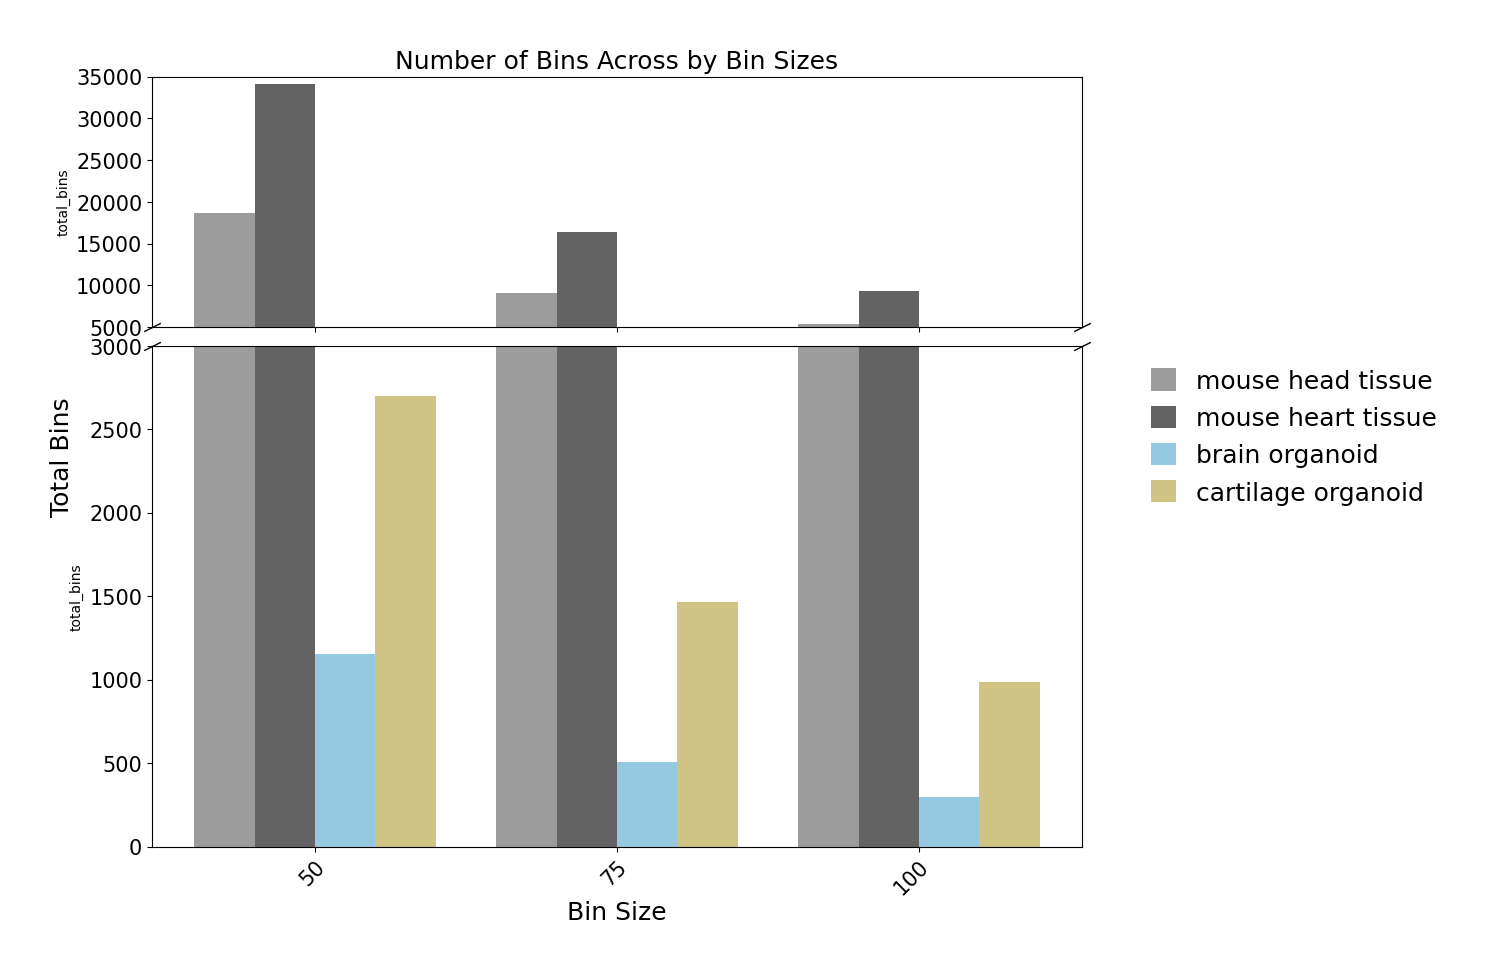

In [40]:
# Create a figure with two subplots stacked vertically with a gap between them
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Plot the same data on both axes
sns.barplot(x='bin_size', y='total_bins', hue='dataset', 
           data=plot_df,
           palette=['#9c9c9c','#636363','#88CCEE', '#DDCC77'], ax=ax1)

sns.barplot(x='bin_size', y='total_bins', hue='dataset', 
           data=plot_df,
           palette=['#9c9c9c','#636363','#88CCEE', '#DDCC77'], ax=ax2)

# Set different y-axis limits for each subplot
# Adjust these values based on your data
ax1.set_ylim(bottom=5000, top=35000)  # Upper section for larger values
ax2.set_ylim(bottom=0, top=3000)     # Lower section for smaller values

# Hide the legend in the upper plot
ax1.legend().set_visible(False)

# Only show legend in the bottom plot
legend = ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

# Adjust only the x-ticks to show 50, 75, 100
for ax in [ax1, ax2]:
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['50', '75', '100'], fontsize=15, rotation=45, ha='right', rotation_mode='anchor')
    ax.tick_params(axis='y', labelsize=15)

# Add title to the top subplot
ax1.set_title('Number of Bins Across by Bin Sizes', fontsize=18)

# Add labels only to the bottom subplot
ax2.set_xlabel('Bin Size', fontsize=18, labelpad=1)
ax1.set_xlabel('')  # Remove x-label from top subplot

# Put y-label in the middle
fig.text(0.04, 0.5, 'Total Bins', va='center', rotation='vertical', fontsize=18)

# Add diagonal lines to indicate the break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
#plt.savefig("counts_per_bin_by_bin_size_barchart.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [43]:
plot_df_mouse = plot_df.head(6)
plot_df_organoid = plot_df.tail(6)

bin_size  total_bins             dataset
0        50        1153      brain organoid
1        75         505      brain organoid
2       100         297      brain organoid
0        50        2698  cartilage organoid
1        75        1467  cartilage organoid
2       100         987  cartilage organoid

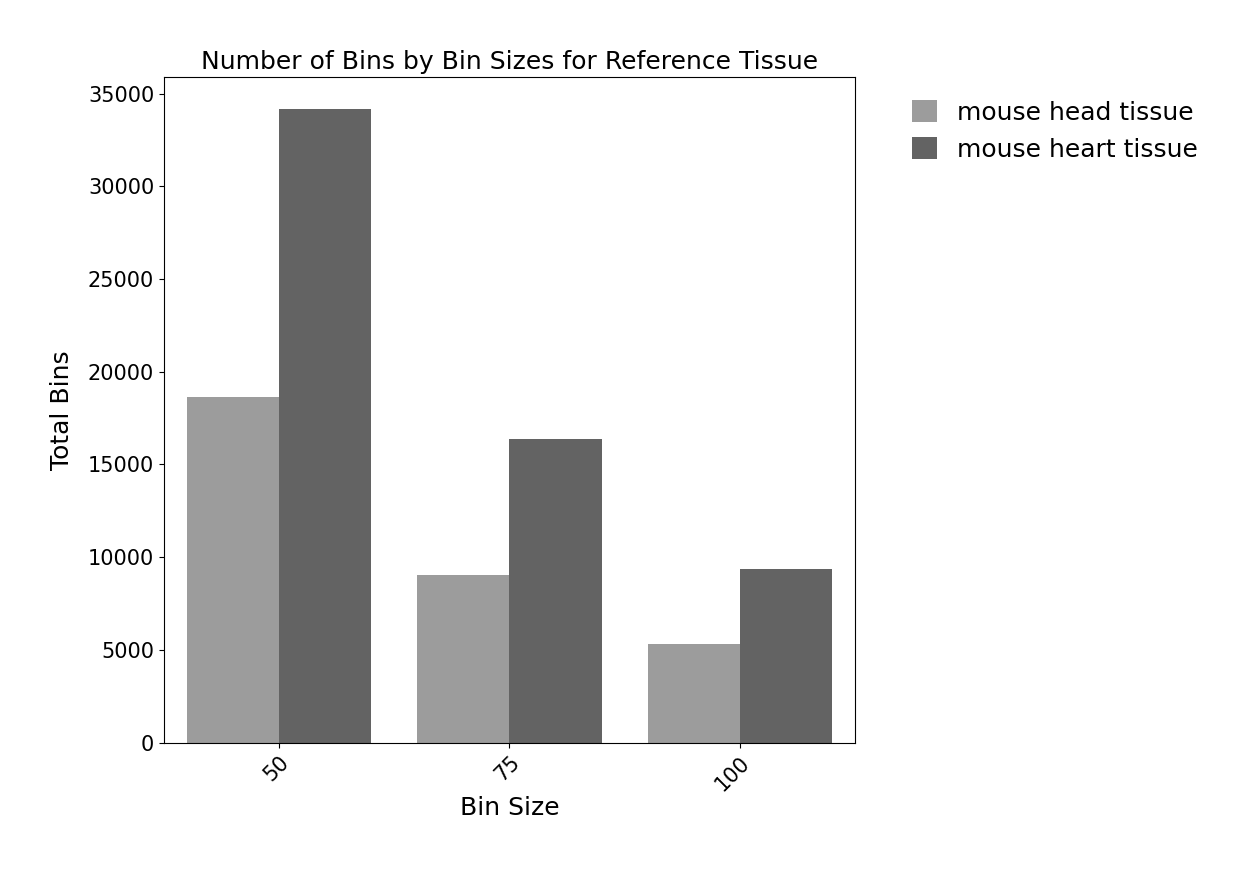

In [49]:
##Do a joint violin plot
# Extract the necessary data
# Plot the same data on both axes


# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='bin_size', y='total_bins', hue='dataset', 
           data=plot_df_mouse,
           palette=['#9c9c9c','#636363'])

# Adjust only the x-ticks to show 50, 75, 100
# Adjust only the x-ticks to show 50, 75, 100
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.title('Number of Bins by Bin Sizes for Reference Tissue',fontsize=18)
plt.xlabel('Bin Size',fontsize=18,labelpad=1)
plt.ylabel('Total Bins',fontsize=18,labelpad=10)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.tight_layout()
plt.savefig("total_bins_by_bin_size_mouse.pdf",format="pdf",bbox_inches="tight")
plt.show()

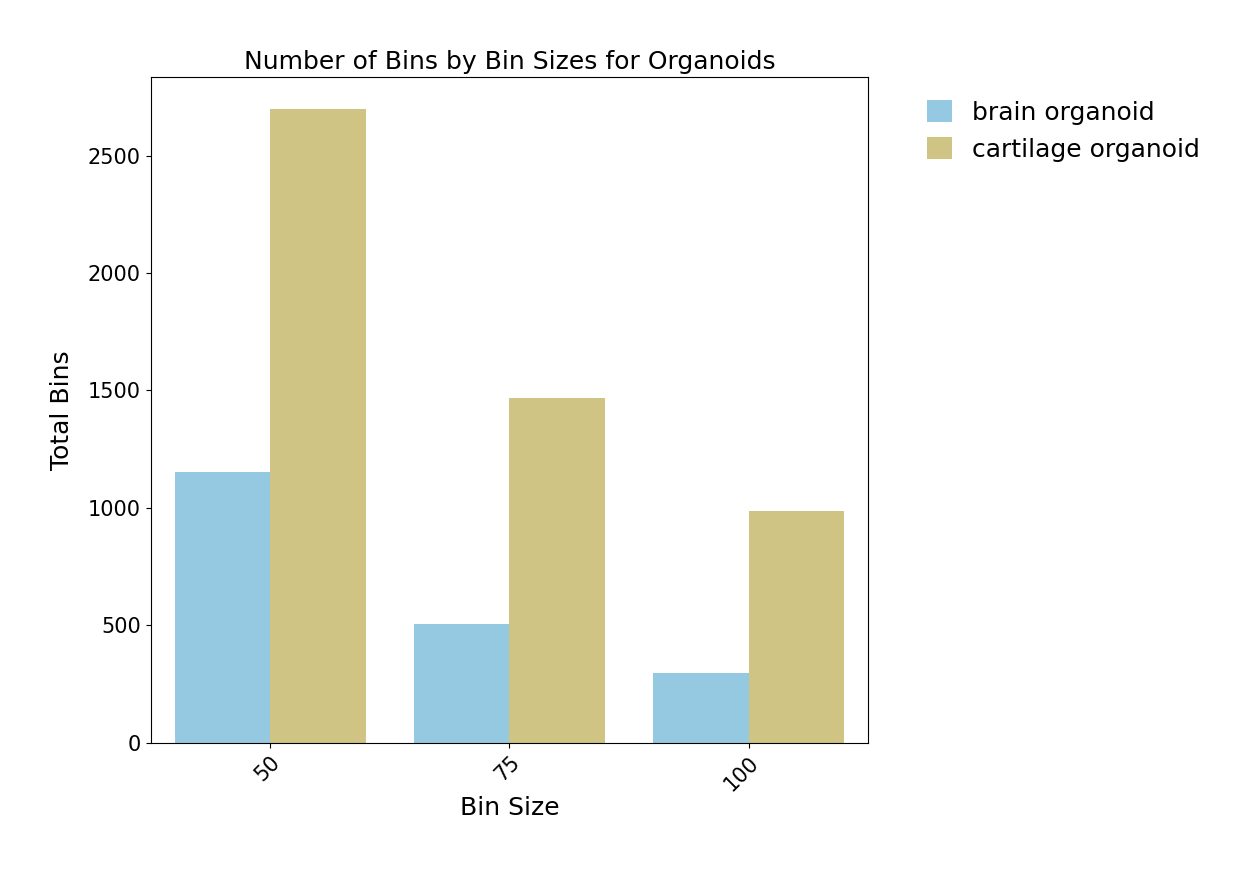

In [48]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='bin_size', y='total_bins', hue='dataset', 
           data=plot_df_organoid,
           palette=['#88CCEE', '#DDCC77'])

# Adjust only the x-ticks to show 50, 75, 100
# Adjust only the x-ticks to show 50, 75, 100
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.title('Number of Bins by Bin Sizes for Organoids',fontsize=18)
plt.xlabel('Bin Size',fontsize=18,labelpad=1)
plt.ylabel('Total Bins',fontsize=18,labelpad=10)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45, ha='right', rotation_mode='anchor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.tight_layout()
plt.savefig("total_bins_by_bin_size_organoids.pdf",format="pdf",bbox_inches="tight")
plt.show()